<a href="https://colab.research.google.com/github/JeongYoon-L/Analysis-TMDB-open-data/blob/main/cse351_project_Lee_JeongYoon_114133199.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#JeongYoon Lee(114133199)_CSE351_Summer_project

- Project #1: Movie Revenue Prediction

#Data Preprocessing

In [343]:
#import libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from ast import literal_eval
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
import seaborn as sns
import scipy.stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
%matplotlib inline

In [344]:
#read csv file
movies_original = pd.read_csv('tmdb_5000_movies.csv')
credits_original = pd.read_csv('tmdb_5000_credits.csv')



In [345]:
#check shape
movies_original.shape

(4803, 20)

In [346]:
#check shape
credits_original.shape

(4803, 4)

In [347]:
#check duplicated id
display(movies_original[movies_original.duplicated("id")])

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


In [348]:
#check duplicated id
display(credits_original[credits_original.duplicated("movie_id")])

,movie_id,title,cast,crew


In [349]:
credits_original.rename(columns = {'movie_id' : 'id'}, inplace = True)
credits_original = credits_original.drop(columns = 'title')
credits_original.head()


,id,cast,crew
0,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [350]:
movies_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [351]:
credits_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      4803 non-null   int64 
 1   cast    4803 non-null   object
 2   crew    4803 non-null   object
dtypes: int64(1), object(2)
memory usage: 112.7+ KB


In [352]:
#merge(left join) with two csv file
data = pd.merge(left = movies_original, right = credits_original, how = "left" , on = "id")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [353]:
#check the number of null value for each columns.
data.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

In [354]:
#fill "NaN" to null value in homepage, overview, tagline columns
data["homepage"] = data["homepage"].fillna("NaN")
data["overview"] = data["overview"].fillna("NaN")
data["tagline"] = data["tagline"].fillna("NaN")

#check the number of null value for each columns.
data.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
cast                    0
crew                    0
dtype: int64

In [355]:
data[data["release_date"].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
4553,0,[],NaN,380097,[],en,America Is Still the Place,1971 post civil rights San Francisco seemed li...,0.0,[],[],NaN,0,0.0,[],Released,NaN,America Is Still the Place,0.0,0,[],[]


When I searched this movie to the "themoviedb.org", and there's no such data for this movie.
So I decided remove this row since there are no any information about this movie in the website also any columns.


In [356]:
drop_row = data[data['release_date'].isnull()].index
data = data.drop( drop_row )
data[data["release_date"].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew


In [357]:
runtime_null  = data[data["runtime"].isnull()]
runtime_null[['title','runtime']]

,title,runtime
2656,Chiamatemi Francesco - Il Papa della gente,NaN
4140,"To Be Frank, Sinatra at 100",NaN


For the movie "Chiamatemi Francesco - Il Papa della gente" which its runtime is null value, we can find that the real runtime for this movie is 1h38m through the tmdb website.
https://www.themoviedb.org/movie/370980-chiamatemi-francesco


In [358]:
data.at[2656, 'runtime'] = 98
data.loc[2656]

budget                                                           15000000
genres                                      [{"id": 18, "name": "Drama"}]
homepage                                                              NaN
id                                                                 370980
keywords                [{"id": 717, "name": "pope"}, {"id": 5565, "na...
original_language                                                      it
original_title                 Chiamatemi Francesco - Il Papa della gente
overview                                                              NaN
popularity                                                       0.738646
production_companies               [{"name": "Taodue Film", "id": 45724}]
production_countries              [{"iso_3166_1": "IT", "name": "Italy"}]
release_date                                                   2015-12-03
revenue                                                                 0
runtime                               

In [359]:
data[data["runtime"].isnull()]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
4140,2,"[{""id"": 99, ""name"": ""Documentary""}]",NaN,459488,"[{""id"": 6027, ""name"": ""music""}, {""id"": 225822,...",en,"To Be Frank, Sinatra at 100",NaN,0.050625,"[{""name"": ""Eyeline Entertainment"", ""id"": 60343}]","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}]",2015-12-12,0,NaN,[],Released,NaN,"To Be Frank, Sinatra at 100",0.0,0,"[{""cast_id"": 0, ""character"": ""Narrator"", ""cred...","[{""credit_id"": ""592b25e4c3a368783e065a2f"", ""de..."


For the movie "To Be Frank, Sinatra at 100" which its runtime is null value, we can find that the real runtime for this movie is 1h21m through the tmdb website. https://www.themoviedb.org/movie/459488-to-be-frank-sinatra-at-100

In [360]:
data.at[4140, 'runtime'] = 81
data.loc[4140]

budget                                                                  2
genres                                [{"id": 99, "name": "Documentary"}]
homepage                                                              NaN
id                                                                 459488
keywords                [{"id": 6027, "name": "music"}, {"id": 225822,...
original_language                                                      en
original_title                                To Be Frank, Sinatra at 100
overview                                                              NaN
popularity                                                       0.050625
production_companies     [{"name": "Eyeline Entertainment", "id": 60343}]
production_countries     [{"iso_3166_1": "GB", "name": "United Kingdom"}]
release_date                                                   2015-12-12
revenue                                                                 0
runtime                               

In [361]:
data[(data['title'] == "To Be Frank, Sinatra at 100") | (data['title'] == "Chiamatemi Francesco - Il Papa della gente")][['title','runtime']]

,title,runtime
2656,Chiamatemi Francesco - Il Papa della gente,98.0
4140,"To Be Frank, Sinatra at 100",81.0


In [362]:
data[(data['revenue'] ==0)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
83,27000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,79698,[],en,The Lovers,The Lovers is an epic romance time travel adve...,2.418535,"[{""name"": ""Corsan"", ""id"": 7299}, {""name"": ""Bli...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}, {""...",2015-02-13,0,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Love is longer than life.,The Lovers,4.8,34,"[{""cast_id"": 11, ""character"": ""James Stewart /...","[{""credit_id"": ""52fe49e0c3a368484e145067"", ""de..."
135,150000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 27, ""name...",http://www.thewolfmanmovie.com/,7978,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Wolfman,"Lawrence Talbot, an American man on a visit to...",21.214571,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-02-11,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When the moon is full the legend comes to life,The Wolfman,5.5,549,"[{""cast_id"": 3, ""character"": ""Lawrence Talbot""...","[{""credit_id"": ""538aeb0a0e0a266718000fc2"", ""de..."
265,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 14, ""nam...",NaN,10588,"[{""id"": 977, ""name"": ""cat""}, {""id"": 1155, ""nam...",en,The Cat in the Hat,Conrad and Sally Walden are home alone with th...,18.251129,"[{""name"": ""Imagine Entertainment"", ""id"": 23}, ...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2003-11-21,0,82.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Don't mess with the hat.,The Cat in the Hat,4.9,366,"[{""cast_id"": 1, ""character"": ""The Cat"", ""credi...","[{""credit_id"": ""52fe438d9251416c75014d95"", ""de..."
309,84000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 35, ""na...",NaN,10214,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 2546, ""n...",en,Son of the Mask,"Tim Avery, an aspiring cartoonist, finds himse...",17.815595,"[{""name"": ""New Line Cinema"", ""id"": 12}, {""name...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",2005-02-18,0,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who's next?,Son of the Mask,3.6,338,"[{""cast_id"": 1, ""character"": ""Tim Avery"", ""cre...","[{""credit_id"": ""52fe43439251416c75009b91"", ""de..."
376,90000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",NaN,10357,"[{""id"": 1552, ""name"": ""subway""}, {""id"": 2859, ...",en,Volcano,An earthquake shatters a peaceful Los Angeles ...,19.836124,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-04-25,0,104.0,"[{""iso_639_1"": ""de"", ""name"": ""Deutsch""}, {""iso...",Released,The coast is toast,Volcano,5.2,376,"[{""cast_id"": 10, ""character"": ""Mike Roark"", ""c...","[{""credit_id"": ""52fe435f9251416c7500dded"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4797,0,"[{""id"": 10769, ""name"": ""Foreign""}, {""id"": 53, ...",NaN,67238,[],en,Cavite,"Adam, a security guard, travels from Californi...",0.022173,[],[],2005-03-12,0,80.0,[],Released,NaN,Cavite,7.5,2,[],"[{""credit_id"": ""52fe475dc3a368484e0c319f"", ""de..."
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id

- I found that dataset which have revenue as 0 value, don't have much information in the TMDB website, and their features are all different.
- I think they have some problem while scrapping those data.
- For this analysis, the revenue will be very important features, so I will remove rows that has 0 revenue since they have all different features and not to affect to predict exact revenue.


In [363]:
data_revenue_zero = data[data['revenue']== 0].index
data_with_revenue = data.drop(data_revenue_zero)
data_with_revenue

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4775,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",NaN,33693,"[{""id"": 171993, ""name"": ""mumblecore""}]",en,Funny Ha Ha,"Unsure of what to do next, 23-year-old Marnie ...",0.362633,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2002-09-20,76901,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Funny Ha Ha,6.3,8,"[{""cast_id"": 1, ""character"": ""Marnie"", ""credit...","[{""credit_id"": ""52fe45309251416c9102a535"

In [364]:
data_with_revenue[(data_with_revenue['budget'] ==0)]

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
321,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,77953,"[{""id"": 6078, ""name"": ""politics""}, {""id"": 6083...",en,The Campaign,Two rival politicians compete to win an electi...,16.460356,"[{""name"": ""Everyman Pictures"", ""id"": 2242}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-08-09,104907746,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,May The Best Loser Win.,The Campaign,5.6,578,"[{""cast_id"": 12, ""character"": ""Cam Brady"", ""cr...","[{""credit_id"": ""587ea5eb9251413f1b02b874"", ""de..."
359,0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 16, ""...",http://www.foxmovies.com/movies/alvin-and-the-...,258509,"[{""id"": 10986, ""name"": ""chipmunk""}, {""id"": 109...",en,Alvin and the Chipmunks: The Road Chip,"Through a series of misunderstandings, Alvin, ...",27.867368,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-12-17,233755553,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Fast & furry-ous,Alvin and the Chipmunks: The Road Chip,5.8,428,"[{""cast_id"": 16, ""character"": ""Dave"", ""credit_...","[{""credit_id"": ""565c2c3f9251416919007486"", ""de..."
409,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10402, ""n...",NaN,16858,"[{""id"": 837, ""name"": ""show business""}, {""id"": ...",en,All That Jazz,Bob Fosse's semi-autobiographical film celebra...,5.159407,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1979-12-20,37823676,123.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,All that work. All that glitter. All that pain...,All That Jazz,7.3,85,"[{""cast_id"": 2, ""character"": ""Joe Gideon"", ""cr...","[{""credit_id"": ""52fe46f09251416c750888a1"", ""de..."
475,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,9433,"[{""id"": 1003, ""name"": ""photographer""}, {""id"": ...",en,The Edge,The plane carrying wealthy Charles Morse crash...,20.632673,"[{""name"": ""Art Linson Productions"", ""id"": 8769}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1997-09-06,43312294,117.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,They were fighting over a woman when the plane...,The Edge,6.7,349,"[{""cast_id"": 9, ""character"": ""Robert Green"", ""...","[{""credit_id"": ""52fe44f6c3a36847f80b48a3"", ""de..."
489,0,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 107...",http://oceans-lefilm.com/,36970,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 658, ""na...",en,Oceans,"An ecological drama/documentary, filmed throug...",10.706613,"[{""name"": ""Path\u00e9 Films"", ""id"": 4959}, {""n...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2009-10-17,19406406,84.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,Explore the depths of our planet's oceans. Ex...,Oceans,7.3,111,"[{""cast_id"": 3, ""character"": ""Narrator (voice:...","[{""credit_id"": ""54186c670e0a2637f900366f"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,0,"[{""id"": 18, ""name"": ""Drama""}]",http://www.dogtooth.gr/,38810,"[{""id"": 255, ""name"": ""male nudity""}, {""id"": 29...",el,Κυνόδοντας,Three teenagers are confined to an isolated co...,28.858238,"[{""name"": ""Greek Film Center"", ""id"": 7254}, {""...","[{""iso_3166_1"": ""GR"", ""name"": ""Greece""}]",2009-06-01,110197,94.0,"[{""iso_639_1"": ""el"", ""name"": ""\u03b5\u03bb\u03...",Released,The cat is the most feared animal there is!,Dogtooth,6.9,332,"[{""cast_id"": 10, ""character"": ""Son"", ""credit_i...","[{""credit_id"": ""53e7e510c3a368399f00231e"", ""de..."
4630,0,"[{""id"": 18, ""name"": ""Drama

- I found that there are some rows that have 0 budgets.
- Similarily, I thought budget can be an important factor while building revenue prediction model.
- So I decided to drop thoses rows also.

In [365]:
data_revenue_zero = data_with_revenue[data_with_revenue['budget']== 0].index
data_with_revenue = data_with_revenue.drop(data_revenue_zero)
data_with_revenue

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.miramax.com/movie/clerks/,2292,"[{""id"": 1361, ""name"": ""salesclerk""}, {""id"": 30...",en,Clerks,Convenience and video store clerks Dante and R...,19.748658,"[{""name"": ""Miramax Films"", ""id"": 14}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Just because they serve you doesn't mean they 

In [366]:
#features which format is dictonary
data[['genres','keywords','production_companies', 'production_countries', 'spoken_languages','cast', 'crew']]

,genres,keywords,production_companies,production_countries,spoken_languages,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...","[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...
4798,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 5616, ""name"": ""united states\u2013mexi...","[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...","[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",[],[],[],[],"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...","[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...","[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,[],[],[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...","[{""iso_639_1"": ""en"", ""name"": ""English""}]","[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [367]:
#make dict to list
data_with_revenue['genres']=data_with_revenue['genres'].apply(literal_eval)
data_with_revenue['genres']=data_with_revenue['genres'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['keywords']=data_with_revenue['keywords'].apply(literal_eval)
data_with_revenue['keywords']=data_with_revenue['keywords'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['production_companies']=data_with_revenue['production_companies'].apply(literal_eval)
data_with_revenue['production_companies']=data_with_revenue['production_companies'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['production_countries']=data_with_revenue['production_countries'].apply(literal_eval)
data_with_revenue['production_countries']=data_with_revenue['production_countries'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['spoken_languages']=data_with_revenue['spoken_languages'].apply(literal_eval)
data_with_revenue['spoken_languages']=data_with_revenue['spoken_languages'].apply(lambda x : [y['iso_639_1'] for y in x] )

data_with_revenue['cast']=data_with_revenue['cast'].apply(literal_eval)
data_with_revenue['cast']=data_with_revenue['cast'].apply(lambda x : [y['name'] for y in x] )

data_with_revenue['crew']=data_with_revenue['crew'].apply(literal_eval)
data_with_revenue['crew']=data_with_revenue['crew'].apply(lambda x : [y['name'] for y in x] )

In [368]:
data_with_revenue[['genres','keywords','production_companies', 'production_countries', 'spoken_languages','cast', 'crew']]

,genres,keywords,production_companies,production_countries,spoken_languages,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]","[en, es]","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B..."
1,"[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],[en],"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe..."
2,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]","[fr, en, es, it, de]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John..."
3,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],[en],"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan..."
4,"[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...",[Walt Disney Pictures],[United States of America],[en],"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter..."
...,...,...,...,...,...,...,...
4773,[Comedy],"[salesclerk, loser, aftercreditsstinger]","[Miramax Films, View Askew Productions]",[United States of America],[en],"[Brian O'Halloran, Jeff Anderson, Jason Mewes,...","[Kevin Smith, Kevin Smith, Kevin Smith, Kevin ..."
4788,"[Horror, Comedy, Crime]","[gay, trailer park, pop culture, drug dealer, ...",[Dreamland Productions],[United States of America],[en],"[Divine, David Lochary, Mary Vivian Pearce, Mi...","[John Waters, John Waters, John Waters, John W..."
4792,"[Crime, Horror, Mystery, Thriller]","[japan, prostitute, hotel, based on novel, hal...",[Daiei Studios],[Japan],[ja],"[Koji Yakusho, Masato Hagiwara, Tsuyoshi Ujiki...","[Kiyoshi Kurosawa, Kiyoshi Kurosawa]"
4796,"[Science Fiction, Drama, Thriller]","[distrust, garage, identity crisis, time trave...",[Thinkfilm],[United States of America],[en],"[Shane Carruth, David Sullivan, Casey Gooden, ...","[Shane Carruth, Shane Carruth, Shane Carruth, ..."


In [369]:
#result
data_with_revenue.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[en, es]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B..."
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[en],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe..."
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[fr, en, es, it, de]",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John..."
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[en],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan..."
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[en],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter..."


In [370]:
#making new columns to check number of features if they have list format.
# It will help me to check if there's any correlation between revenue and these features and also for the prediction model.
data_with_revenue['num_of_genres'] = data_with_revenue["genres"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_keywords'] = data_with_revenue["keywords"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_production_companies'] = data_with_revenue["production_companies"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_production_countries'] = data_with_revenue["production_countries"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_spoken_languages'] = data_with_revenue["spoken_languages"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_cast'] = data_with_revenue["cast"].apply(lambda x: len(x) if x != {} else 0)
data_with_revenue['num_of_crew'] = data_with_revenue["crew"].apply(lambda x: len(x) if x != {} else 0)

data_with_revenue.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,num_of_genres,num_of_keywords,num_of_production_companies,num_of_production_countries,num_of_spoken_languages,num_of_cast,num_of_crew
0,237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war, space colon...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[en, es]",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[Sam Worthington, Zoe Saldana, Sigourney Weave...","[Stephen E. Rivkin, Rick Carter, Christopher B...",4,21,4,2,2,83,153
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,[en],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[Dariusz Wolski, Gore Verbinski, Jerry Bruckhe...",3,16,3,1,1,34,32
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[fr, en, es, it, de]",Released,A Plan No One Escapes,Spectre,6.3,4466,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[Thomas Newman, Sam Mendes, Anna Pinnock, John...",3,7,3,2,5,83,155
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[en],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan...",4,21,4,1,1,158,217
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion, space travel...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,[en],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[Andrew Stanton, Andrew Stanton, John Lasseter...",3,16,1,1,1,27,132


In [371]:
#Final Dataset
data_with_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3229 entries, 0 to 4798
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   budget                       3229 non-null   int64  
 1   genres                       3229 non-null   object 
 2   homepage                     3229 non-null   object 
 3   id                           3229 non-null   int64  
 4   keywords                     3229 non-null   object 
 5   original_language            3229 non-null   object 
 6   original_title               3229 non-null   object 
 7   overview                     3229 non-null   object 
 8   popularity                   3229 non-null   float64
 9   production_companies         3229 non-null   object 
 10  production_countries         3229 non-null   object 
 11  release_date                 3229 non-null   object 
 12  revenue                      3229 non-null   int64  
 13  runtime           

#Time Series Analysis by released day

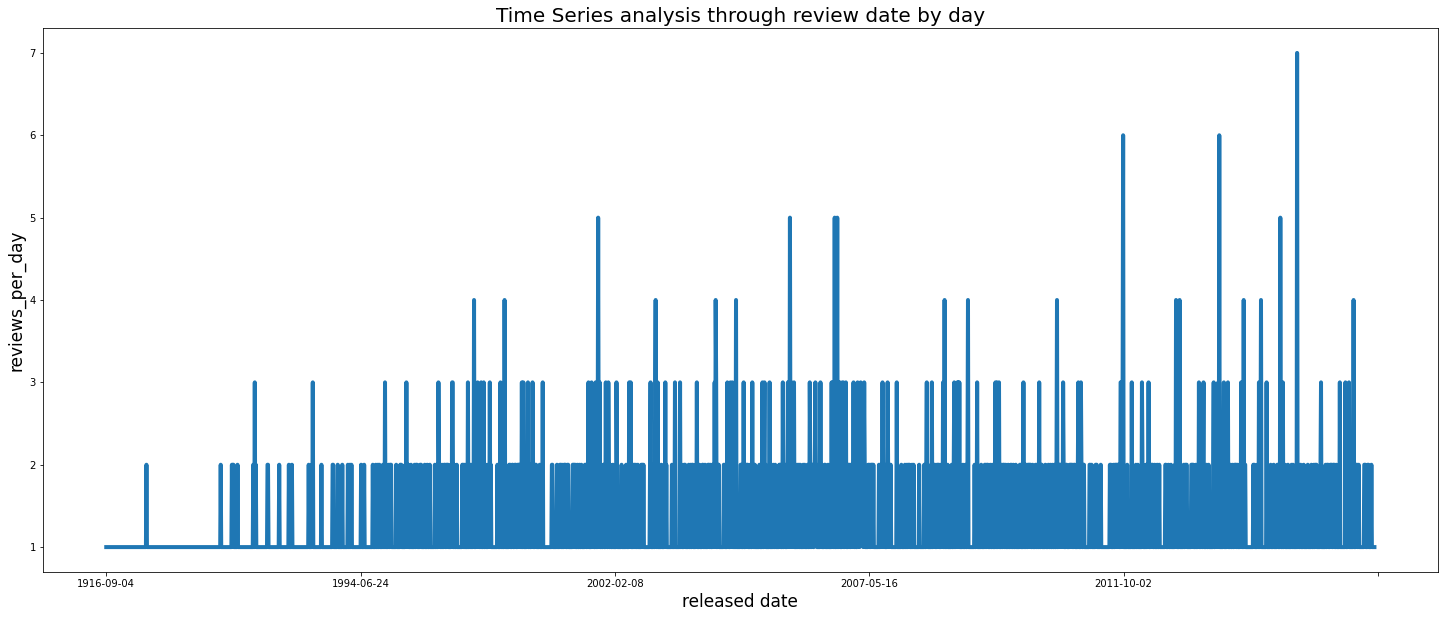

In [372]:
#The number of movies released by day
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()
data_day

data_day.plot(figsize = (25,10),linewidth = 4)
plt.title('Time Series analysis through review date by day', fontsize=20)
plt.xlabel('released date', fontsize=17)
plt.ylabel('reviews_per_day', fontsize=17)

plt.show()

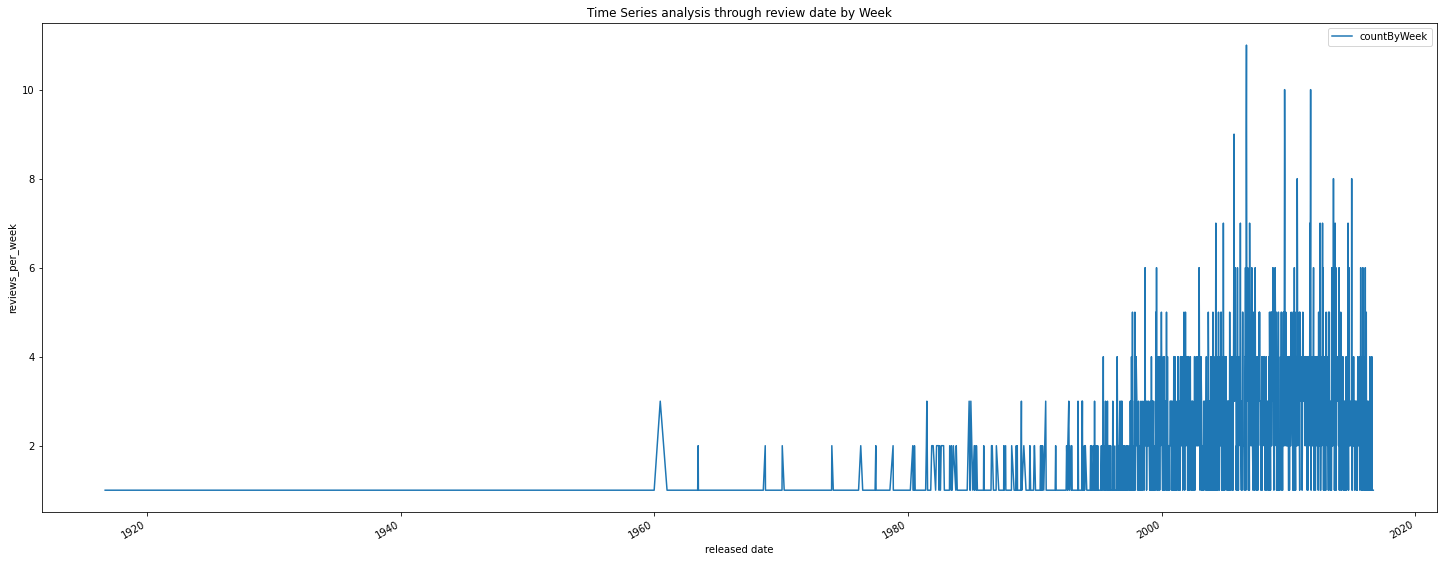

In [373]:
#The number of movies released by week
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()

data_day = pd.DataFrame(data_day, columns=['countByWeek'])
df_time = pd.to_datetime(data_day.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
data_day = data_day.set_index(datetime_index)

data_day = data_day.resample('1W').sum()

drop_row_week = data_day[data_day['countByWeek']==0].index
data_day = data_day.drop( drop_row_week )

data_day.plot(figsize = (25,10), title = 'Time Series analysis through review date by Week', xlabel = "released date", ylabel = 'reviews_per_week')


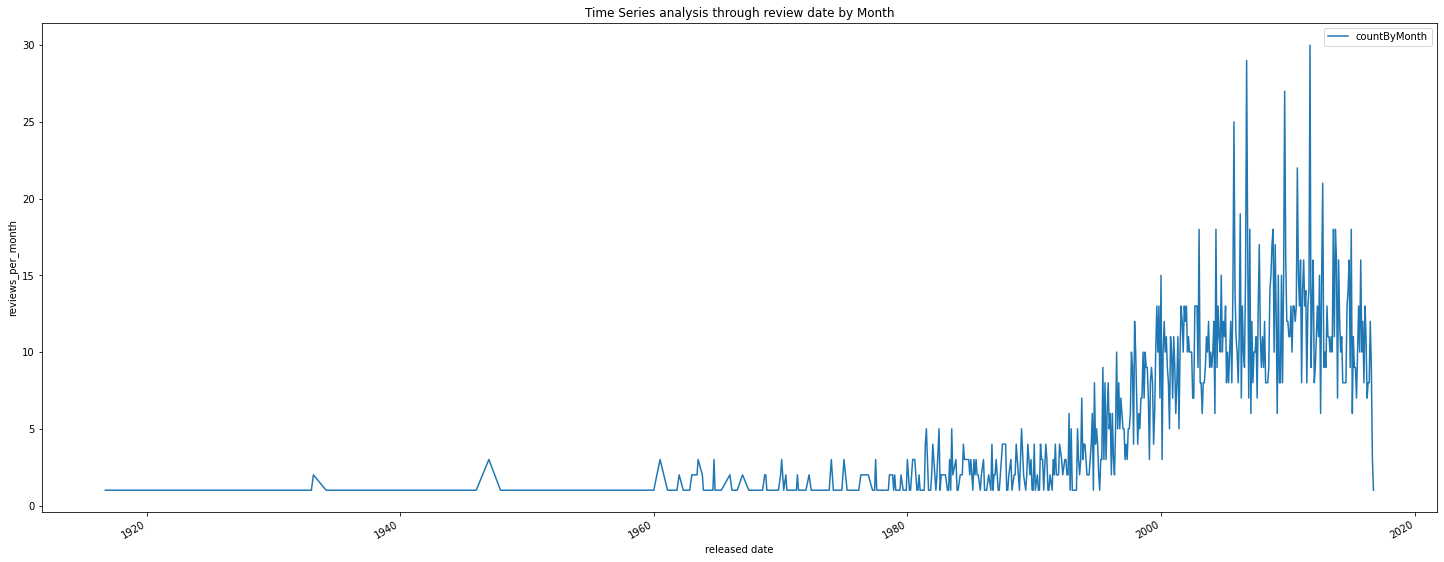

In [374]:
#The number of movies released by Month
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()

data_day = pd.DataFrame(data_day, columns=['countByMonth'])
df_time = pd.to_datetime(data_day.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
data_day = data_day.set_index(datetime_index)

data_day = data_day.resample('1M').sum()

drop_row_week = data_day[data_day['countByMonth']==0].index
data_day = data_day.drop( drop_row_week )

data_day.plot(figsize = (25,10), title = 'Time Series analysis through review date by Month', xlabel = "released date", ylabel = 'reviews_per_month')


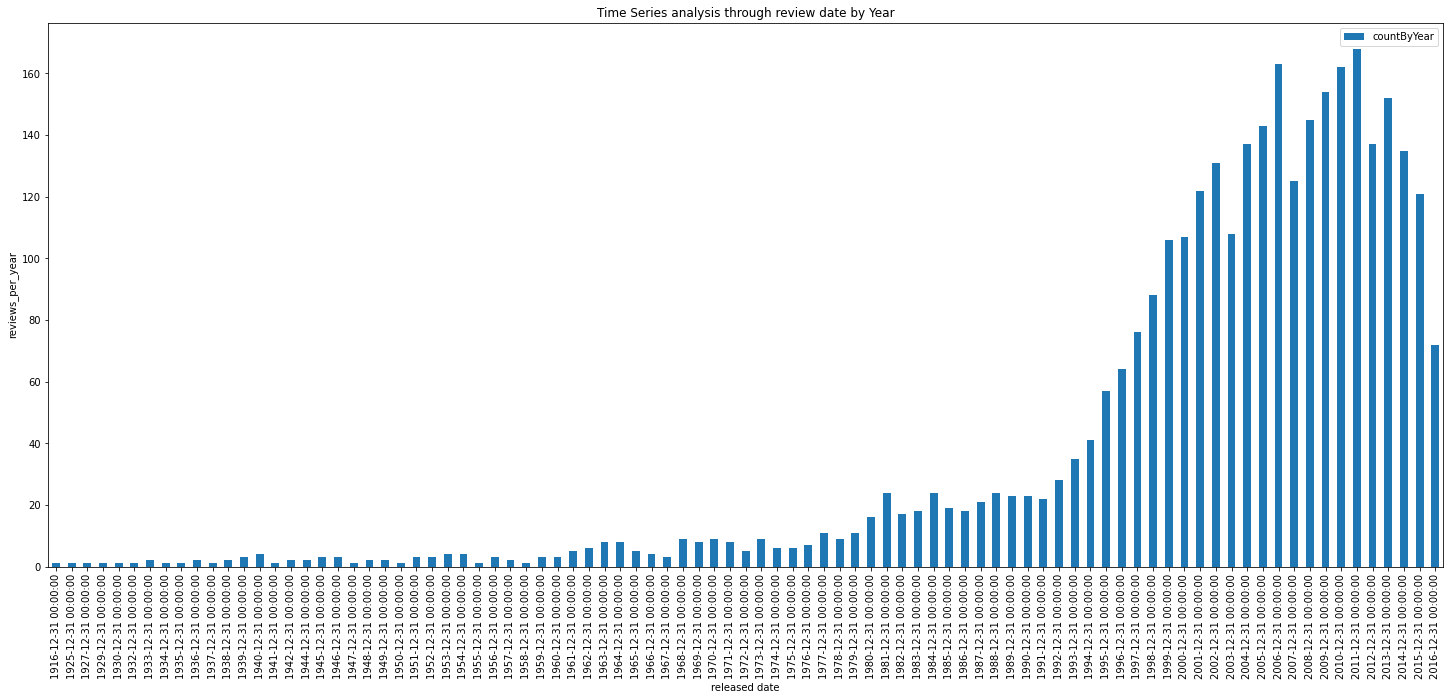

In [375]:
#The number of movies released by Year
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()

data_day = pd.DataFrame(data_day, columns=['countByYear'])
df_time = pd.to_datetime(data_day.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
data_day = data_day.set_index(datetime_index)

data_day
#Resample the dataframe
data_day = data_day.resample('1Y').sum()

drop_row_week = data_day[data_day['countByYear']==0].index
data_day = data_day.drop( drop_row_week )
data_day.plot(figsize = (25,10), title = 'Time Series analysis through review date by Year', xlabel = "released date", ylabel = 'reviews_per_year', kind = 'bar')


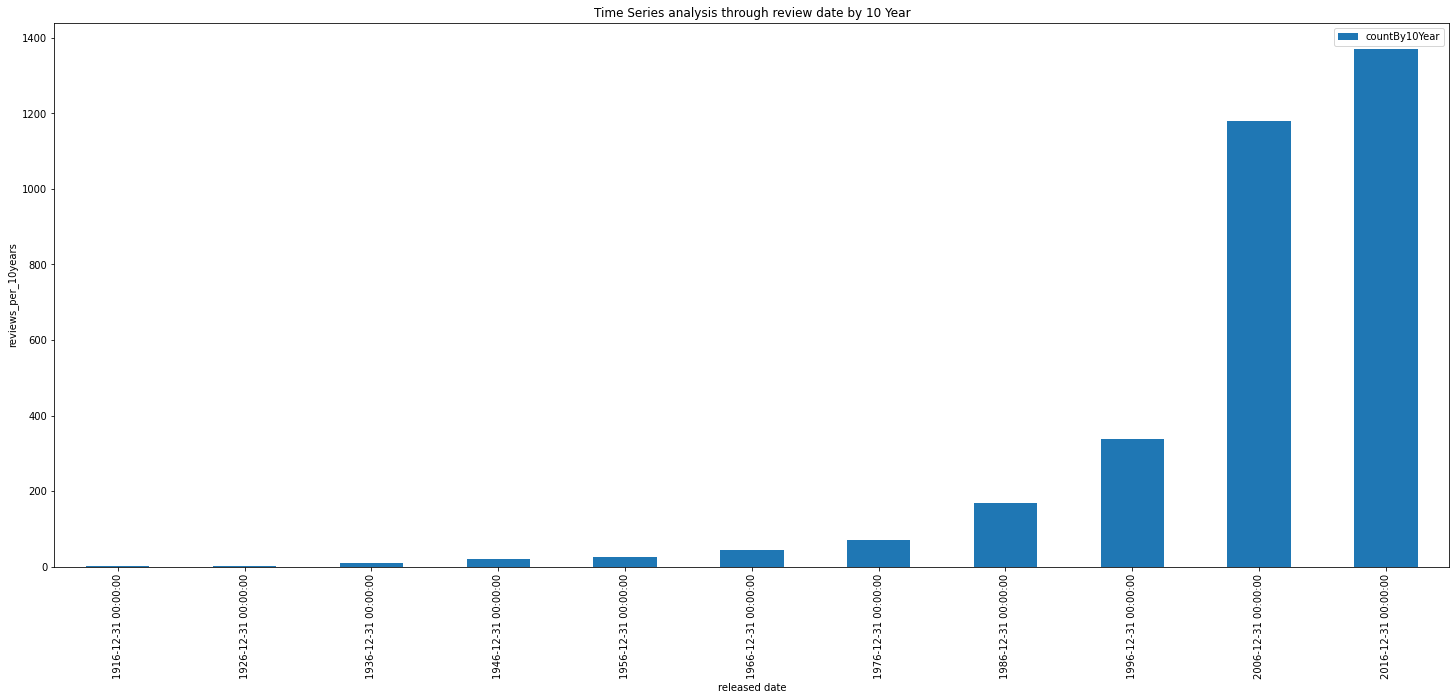

In [376]:
#The number of movies released by 10 year
data_day = data_with_revenue.copy()
data_day = data_day.groupby(['release_date']).size()

data_day = pd.DataFrame(data_day, columns=['countBy10Year'])
df_time = pd.to_datetime(data_day.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
data_day = data_day.set_index(datetime_index)

data_day
#Resample the dataframe
data_day = data_day.resample('10Y').sum()

drop_row_week = data_day[data_day['countBy10Year']==0].index
data_day = data_day.drop( drop_row_week )

data_day.plot(figsize = (25,10), title = 'Time Series analysis through review date by 10 Year', xlabel = "released date", ylabel = 'reviews_per_10years', kind = 'bar')


,countByMonth
1953-06-30,1
1960-06-30,1
1968-06-30,1
1968-10-31,1
1972-03-31,1
...,...
2016-02-29,2
2016-04-30,1
2016-05-31,1
2016-06-30,3


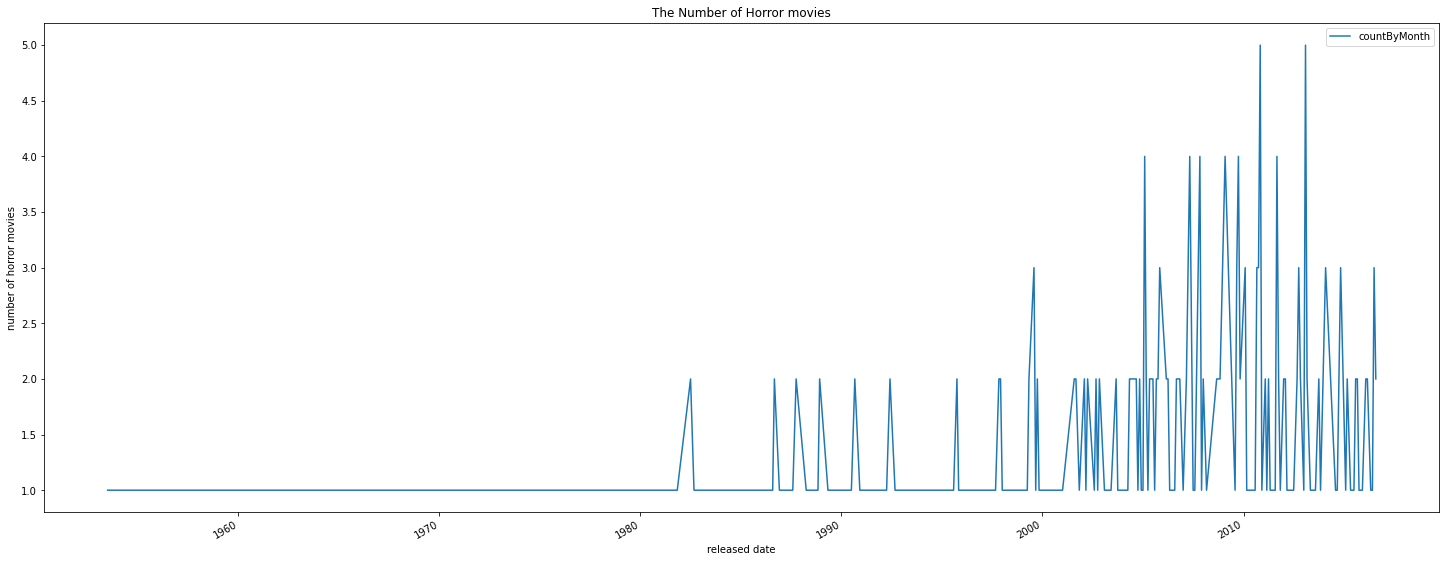

In [377]:
#The number of horror movies released by day
list_of_genre_is_horror = data_with_revenue.copy()
list_of_genre_is_horror["Horror"] = data_with_revenue["genres"].apply(lambda x: 1 if "Horror" in x else 0)
list_of_genre_is_horror = list_of_genre_is_horror[list_of_genre_is_horror["Horror"] ==1 ]
list_of_genre_is_horror = list_of_genre_is_horror.drop(columns = 'Horror')
list_of_genre_is_horror

data_day_horror = list_of_genre_is_horror.copy()
data_day_horror = data_day_horror.groupby(['release_date']).size()
data_day_horror


data_day_horror = pd.DataFrame(data_day_horror, columns=['countByMonth'])
df_time = pd.to_datetime(data_day_horror.index)
datetime_index = pd.DatetimeIndex(df_time.values) 
data_day_horror = data_day_horror.set_index(datetime_index)

data_day_horror = data_day_horror.resample('1M').sum()

drop_row_week = data_day_horror[data_day_horror['countByMonth']==0].index
data_day_horror = data_day_horror.drop( drop_row_week )

data_day_horror
data_day_horror.plot(figsize = (25,10), title = 'The Number of Horror movies', xlabel = "released date", ylabel = 'number of horror movies')
data_day_horror


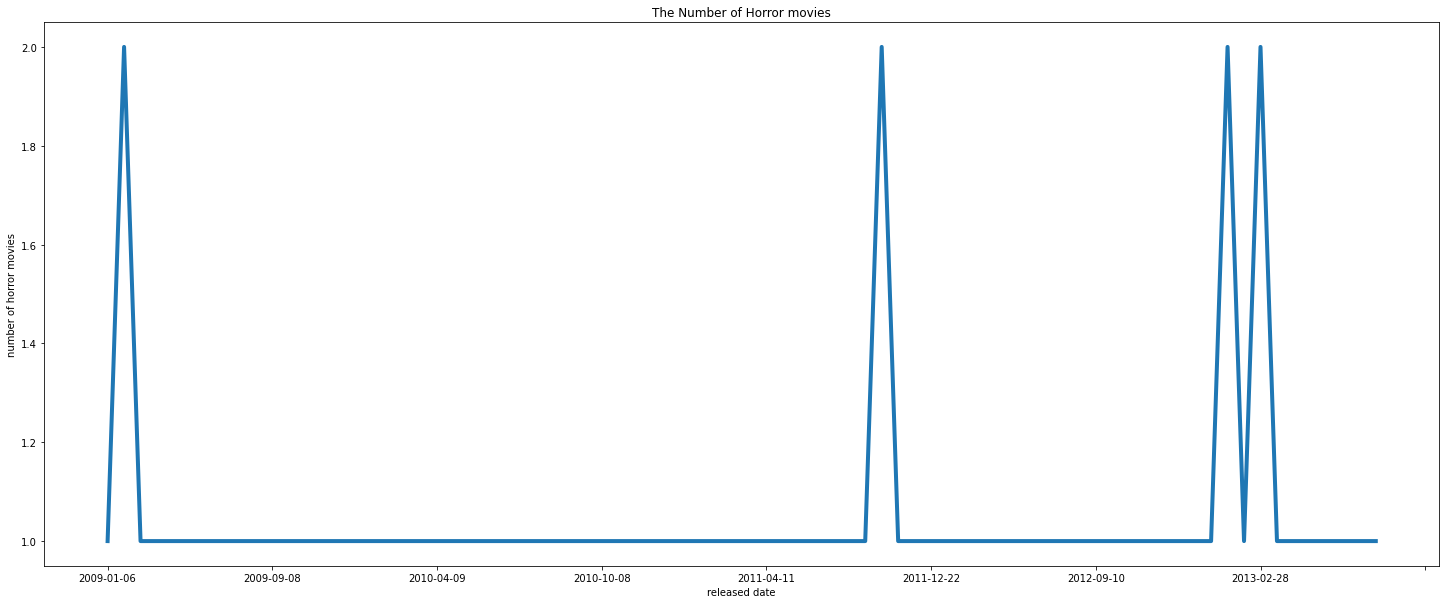

In [378]:
#The number of horror movies released by day (2009~2013) and find pattern

genre_2000_horror = data_with_revenue[data_with_revenue['release_date'].str.startswith("2009") | data_with_revenue['release_date'].str.startswith("2010") | data_with_revenue['release_date'].str.startswith("2011") | data_with_revenue['release_date'].str.startswith("2012") | data_with_revenue['release_date'].str.startswith("2013")]
genre_2000_horror["Horror"] = genre_2000_horror["genres"].apply(lambda x: 1 if "Horror" in x else 0)
genre_2000_horror = genre_2000_horror[genre_2000_horror["Horror"] ==1 ]
genre_2000_horror = genre_2000_horror.drop(columns = 'Horror')

data_day_horror = genre_2000_horror.copy()
data_day_horror = data_day_horror.groupby(['release_date']).size()
data_day_horror

data_day_horror.plot(figsize = (25,10), title = 'The Number of Horror movies', xlabel = "released date", ylabel = 'number of horror movies',linewidth = 4)
plt.show()


#Genre

,Freq
Genre,
Drama,1441
Comedy,1110
Thriller,935
Action,918
Adventure,661
Romance,574
Crime,521
Science Fiction,431
Family,365


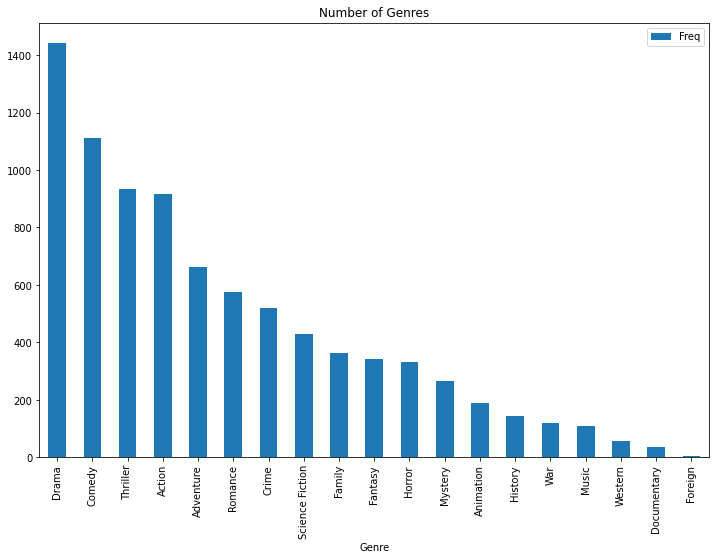

In [379]:
#The number of movies by genres

list_of_genre = list(data_with_revenue["genres"])
text_list = [i for j in list_of_genre for i in j]

from collections import Counter

genres_common = Counter(text_list).most_common() 

genres_common

genres_freq = pd.DataFrame()
genres_freq["Genre"] = [genres_common[i][0] for i in range(len(genres_common))]
genres_freq.index = genres_freq["Genre"]
genres_freq = genres_freq.drop(columns = 'Genre')
genres_freq["Freq"] = [genres_common[i][1] for i in range(len(genres_common))]
genres_freq.plot(kind = 'bar', figsize = (12,8),title='Number of Genres')
genres_freq

In [380]:
#The number of movies by genres per 10 years

genre_1910 = data_with_revenue[data_with_revenue['release_date'].str.startswith("191")]
genre_1920 = data_with_revenue[data_with_revenue['release_date'].str.startswith("192")]
genre_1930 = data_with_revenue[data_with_revenue['release_date'].str.startswith("193")]
genre_1940 = data_with_revenue[data_with_revenue['release_date'].str.startswith("194")]
genre_1950 = data_with_revenue[data_with_revenue['release_date'].str.startswith("195")]
genre_1960 = data_with_revenue[data_with_revenue['release_date'].str.startswith("196")]
genre_1970 = data_with_revenue[data_with_revenue['release_date'].str.startswith("197")]
genre_1980 = data_with_revenue[data_with_revenue['release_date'].str.startswith("198")]
genre_1990 = data_with_revenue[data_with_revenue['release_date'].str.startswith("199")]
genre_2000 = data_with_revenue[data_with_revenue['release_date'].str.startswith("200")]
genre_2010 = data_with_revenue[data_with_revenue['release_date'].str.startswith("201")]

(-0.5, 1199.5, 999.5, -0.5)

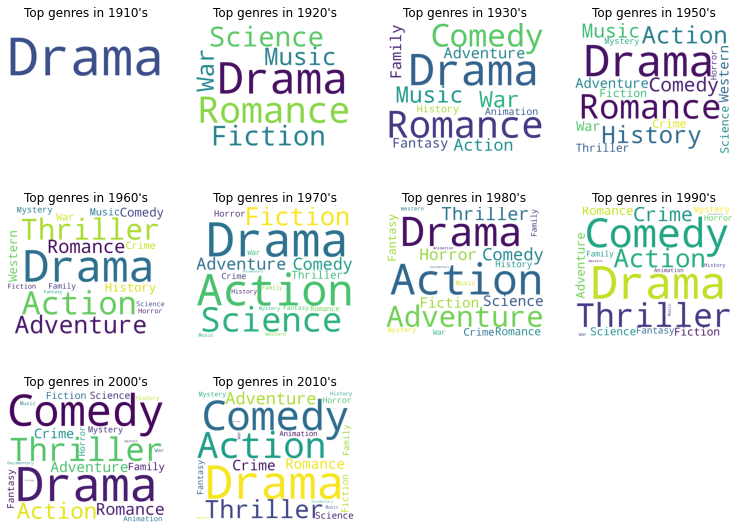

In [381]:
fig=plt.figure(figsize = (13,13))
rows = 4
cols = 4
axes=[]


list_of_genre_1910 = list(genre_1910["genres"])
text = " ".join([i for j in list_of_genre_1910 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 1)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1910's") 
plt1.axis("off") 

list_of_genre_1920 = list(genre_1920["genres"])
text = " ".join([i for j in list_of_genre_1920 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 2)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1920's") 
plt1.axis("off") 

list_of_genre_1930 = list(genre_1930["genres"])
text = " ".join([i for j in list_of_genre_1930 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 3)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1930's") 
plt1.axis("off") 

list_of_genre_1940 = list(genre_1940["genres"])
text = " ".join([i for j in list_of_genre_1940 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 4)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1940's") 
plt1.axis("off") 

list_of_genre_1950 = list(genre_1950["genres"])
text = " ".join([i for j in list_of_genre_1950 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 4)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1950's") 
plt1.axis("off") 

list_of_genre_1960 = list(genre_1960["genres"])
text = " ".join([i for j in list_of_genre_1960 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 5)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1960's") 
plt1.axis("off") 

list_of_genre_1970 = list(genre_1970["genres"])
text = " ".join([i for j in list_of_genre_1970 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 6)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1970's") 
plt1.axis("off") 

list_of_genre_1980 = list(genre_1980["genres"])
text = " ".join([i for j in list_of_genre_1980 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 7)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1980's") 
plt1.axis("off") 

list_of_genre_1990 = list(genre_1990["genres"])
text = " ".join([i for j in list_of_genre_1990 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 8)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 1990's") 
plt1.axis("off") 

list_of_genre_2000 = list(genre_2000["genres"])
text = " ".join([i for j in list_of_genre_2000 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 9)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 2000's") 
plt1.axis("off") 

list_of_genre_2010 = list(genre_2010["genres"])
text = " ".join([i for j in list_of_genre_2010 for i in j])
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text)
plt1 = fig.add_subplot(rows,cols, 10)
plt1.imshow(word_cloud) 
plt1.set_title("Top genres in 2010's") 
plt1.axis("off") 


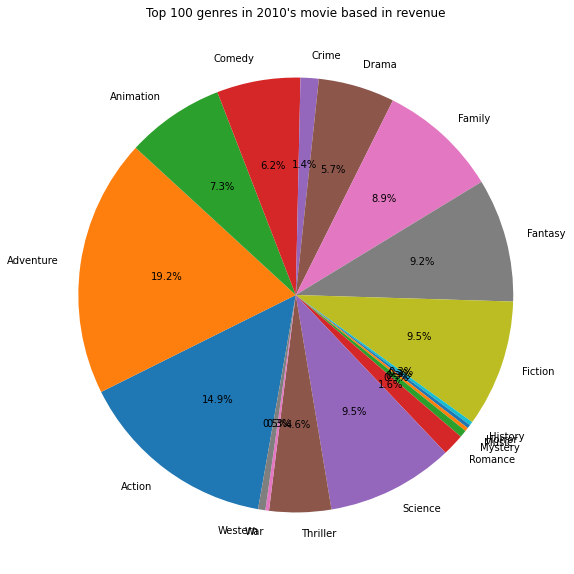

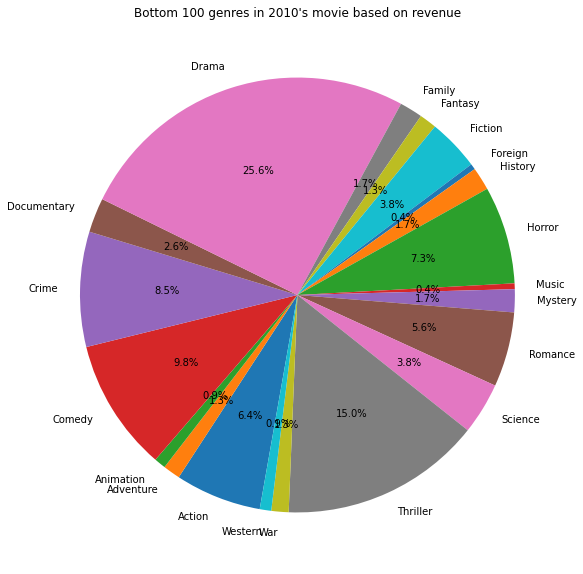

In [382]:
#Find the highest and lowerist movies based on revenue in 2010's

highest_revenue_movies = genre_2010.sort_values(by = 'revenue', ascending = False)[:100]
highest_revenue_movies = list(highest_revenue_movies["genres"])
text = " ".join([i for j in highest_revenue_movies for i in j])

wordCount = {} 
wordList = text.split()
word_freq_highest = pd.DataFrame( columns=['word', 'num'])
for word in wordList:
    wordCount[word] = wordCount.get(word, 0) + 1 
    keys = sorted(wordCount.keys())
 
for word in keys:
  word_freq_highest = word_freq_highest.append(pd.DataFrame([[word,wordCount[word]]], columns=['word', 'num']))

lowest_revenue_movies = genre_2010.sort_values(by = 'revenue', ascending = True)[:100]
lowest_revenue_movies = list(lowest_revenue_movies["genres"])
text = " ".join([i for j in lowest_revenue_movies for i in j])

wordCount = {} 
wordList = text.split()
word_freq_lowest = pd.DataFrame( columns=['word', 'num'])
for word in wordList:
    wordCount[word] = wordCount.get(word, 0) + 1 
    keys = sorted(wordCount.keys())
 
for word in keys:
  word_freq_lowest = word_freq_lowest.append(pd.DataFrame([[word,wordCount[word]]], columns=['word', 'num']))




plt.figure(figsize = (10,10))
plt.title("Top 100 genres in 2010's movie based in revenue")
plt.pie(word_freq_highest['num'], labels = word_freq_highest['word'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()


plt.figure(figsize = (10,10))
plt.title("Bottom 100 genres in 2010's movie based on revenue")
plt.pie(word_freq_lowest['num'], labels = word_freq_lowest['word'], autopct='%.1f%%', startangle=260, counterclock=False)
plt.show()

- Drama is the worst movie genre which get less revenue. 
- But through the wordcloud, it seems that the drama genre was released the most in 2010's.

In [383]:
#Find Drama movies 
list_of_genre_is_drama = genre_2010.copy()
list_of_genre_is_drama["Drama"] = genre_2010["genres"].apply(lambda x: 1 if "Drama" in x else 0)
list_of_genre_is_drama = list_of_genre_is_drama[list_of_genre_is_drama["Drama"] ==1 ]
list_of_genre_is_drama = list_of_genre_is_drama.drop(columns = 'Drama')

In [384]:
#Top 3 data in Drama movies based on revenue
list_of_genre_is_drama["revenue"].describe()
highest_drama = list_of_genre_is_drama.sort_values(by = 'revenue', ascending = False)[:3]

highest_drama

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,num_of_genres,num_of_keywords,num_of_production_companies,num_of_production_countries,num_of_spoken_languages,num_of_cast,num_of_crew
3,250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,[en],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[Christian Bale, Michael Caine, Gary Oldman, A...","[Hans Zimmer, Charles Roven, Christopher Nolan...",4,21,4,1,1,158,217
78,175000000,"[Family, Adventure, Drama, Fantasy]",http://movies.disney.com/the-jungle-book-2016,278927,"[based on novel, snake, wolf, elephant, tiger,...",en,The Jungle Book,After a threat from the tiger Shere Khan force...,94.199316,"[Walt Disney Pictures, Walt Disney Studios Mot...","[United Kingdom, United States of America]",2016-04-07,966550600,106.0,[en],Released,NaN,The Jungle Book,6.7,2892,"[Neel Sethi, Bill Murray, Ben Kingsley, Idris ...","[John Debney, Sarah Finn, Mark Livolsi, Bill P...",4,14,4,2,1,30,25
77,175000000,"[Drama, Comedy, Animation, Family]",http://movies.disney.com/inside-out,150540,"[dream, cartoon, imaginary friend, animation, ...",en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",128.655964,"[Walt Disney Pictures, Pixar Animation Studios]",[United States of America],2015-06-09,857611174,94.0,[en],Released,Meet the little voices inside your head.,Inside Out,8.0,6560,"[Amy Poehler, Phyllis Smith, Richard Kind, Bil...","[Andrew Stanton, Bob Peterson, John Lasseter, ...",4,11,2,1,1,65,50


In [385]:
#Bottom 3 data in Drama movies based on revenue
lowest_drama = list_of_genre_is_drama.sort_values(by = 'revenue', ascending = True)[:3]
lowest_drama

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,num_of_genres,num_of_keywords,num_of_production_companies,num_of_production_countries,num_of_spoken_languages,num_of_cast,num_of_crew
3131,10,"[Drama, Romance, Comedy]",http://hrosss.is/the-film/,217708,"[horse, snow storm, icelandic]",is,Hross í oss,A country romance about the human streak in th...,1.617943,"[Filmhuset Gruppen, Leiknar Myndir]","[Norway, Iceland]",2013-08-30,11,85.0,"[en, is, ru, es, sv]",Released,NaN,Of Horses and Men,6.9,26,"[Ingvar Eggert Sigurðsson, Charlotte Bøving, S...","[Friðrik Þór Friðriksson, Benedikt Erlingsson,...",3,3,2,2,5,16,9
4065,2100000,"[Drama, Crime]",http://miamericamovie.net/,364083,"[new york state, hate crime]",en,Mi America,A hate-crime has been committed in a the small...,0.039007,[Industrial House Films],[United States of America],2015-10-16,3330,126.0,"[es, en]",Released,NaN,Mi America,0.0,0,"[Robert Fontaine, Michael Brainard, Grant Boyd...","[Marko A. Costanzo, Rick Porras, Robert Fontai...",2,2,1,1,2,5,7
3120,10000000,"[Drama, Thriller]",NaN,245846,"[australia, missing child, outback, alcoholic ...",en,Strangerland,"Newly arrived to a remote desert town, Catheri...",5.145655,[Worldview Entertainment],[Australia],2015-07-01,17472,111.0,[en],Released,To find the truth they must lose themselves.,Strangerland,5.1,83,"[Nicole Kidman, Joseph Fiennes, Hugo Weaving, ...","[Veronika Jenet, Nikki Barrett, Melinda Doring...",2,8,1,1,1,10,13


#Data Scaling

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe66cae0b90>,
      dtype=object)

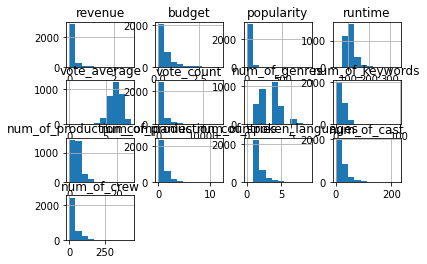

In [387]:
#Continous Data Histogram
data_continuous = data_with_revenue[['revenue','budget','popularity','runtime','vote_average','vote_count','num_of_genres', 'num_of_keywords','num_of_production_companies','num_of_production_countries','num_of_spoken_languages','num_of_cast','num_of_crew' ]]
data_continuous.hist()



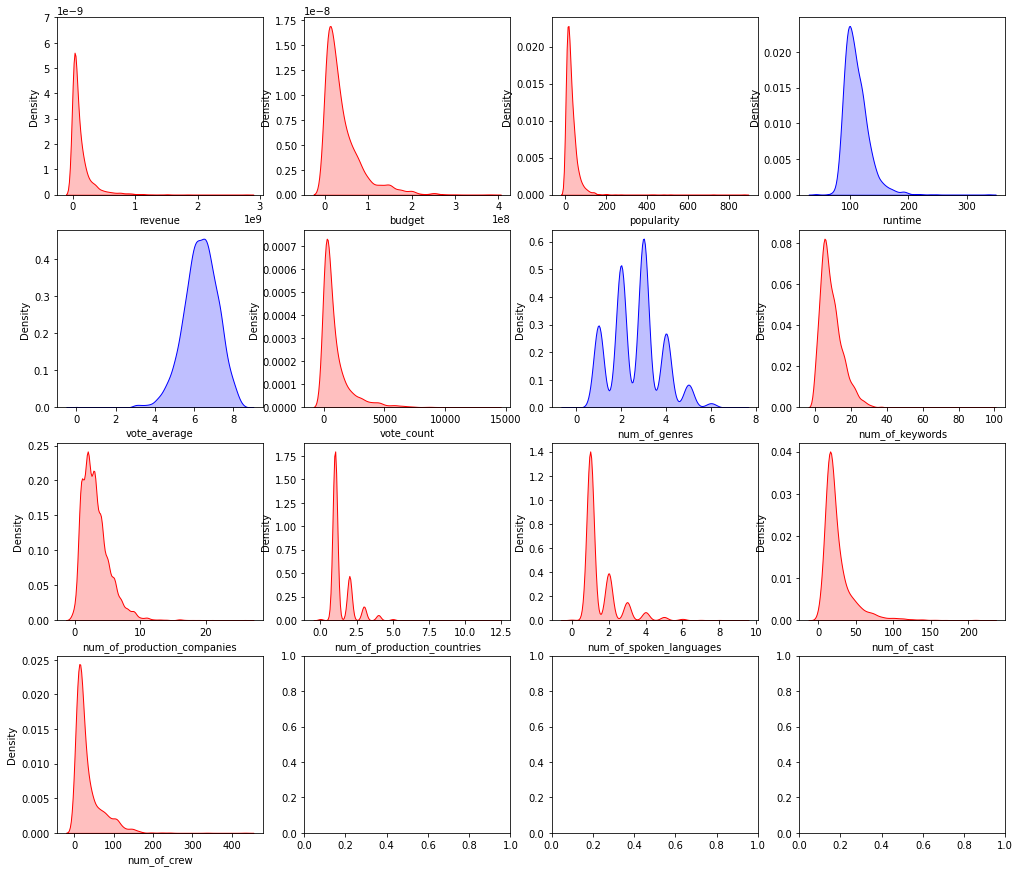

             <Skewness> 
[revenue] : 3.818316479714257
[budget] : 2.0886549188400836
[popularity] : 9.261435590982792
[runtime] : 1.6937575956631943
[vote_average] : -0.6078883476953402
[vote_count] : 3.206093933634065
[num_of_genres] : 0.3757656595561392
[num_of_keywords] : 1.963829122877158
[num_of_production_companies] : 2.0319610862570467
[num_of_production_countries] : 2.9425279185718827
[num_of_spoken_languages] : 2.4197241594551233
[num_of_cast] : 3.1115040220673067
[num_of_crew] : -0.067500453782168


In [388]:
f, axes = plt.subplots(4, 4, figsize=(17, 15))

a = sns.kdeplot(data_continuous["revenue"],shade = True, color="red", ax=axes[0, 0])
a.set_ylim(0,0.000000007)
sns.kdeplot(data_continuous["budget"], shade = True,color="red", ax=axes[0, 1])
sns.kdeplot(data_continuous["popularity"], shade = True,color="red", ax=axes[0, 2])
sns.kdeplot(data_continuous["runtime"], shade = True,color="blue", ax=axes[0, 3])
sns.kdeplot(data_continuous["vote_average"],shade = True, color="blue", ax=axes[1, 0])
sns.kdeplot(data_continuous["vote_count"], shade = True,color="red", ax=axes[1, 1])
sns.kdeplot(data_continuous["num_of_genres"], shade = True,color="blue", ax=axes[1, 2])
sns.kdeplot(data_continuous["num_of_keywords"],shade = True, color="red", ax=axes[1, 3])
sns.kdeplot(data_continuous["num_of_production_companies"],shade = True, color="red", ax=axes[2, 0])
sns.kdeplot(data_continuous["num_of_production_countries"],shade = True, color="red", ax=axes[2, 1])
sns.kdeplot(data_continuous["num_of_spoken_languages"],shade = True, color="red", ax=axes[2, 2])
sns.kdeplot(data_continuous["num_of_cast"],shade = True, color="red", ax=axes[2, 3])
sns.kdeplot(data_continuous["num_of_crew"],shade = True, color="red", ax=axes[3, 0])

plt.show()
print("             <Skewness> ")
print("[revenue] :", scipy.stats.skew(data_continuous['revenue']))
print("[budget] :", scipy.stats.skew(data_continuous['budget']))
print("[popularity] :", scipy.stats.skew(data_continuous['popularity']))
print("[runtime] :", scipy.stats.skew(data_continuous['runtime']))
print("[vote_average] :", scipy.stats.skew(data_continuous['vote_average']))
print("[vote_count] :", scipy.stats.skew(data_continuous['vote_count']))
print("[num_of_genres] :", scipy.stats.skew(data_continuous['num_of_genres']))
print("[num_of_keywords] :", scipy.stats.skew(data_continuous['num_of_keywords']))
print("[num_of_production_companies] :", scipy.stats.skew(data_continuous['num_of_production_companies']))
print("[num_of_production_countries] :", scipy.stats.skew(data_continuous['num_of_production_countries']))
print("[num_of_spoken_languages] :", scipy.stats.skew(data_continuous['num_of_spoken_languages']))
print("[num_of_cast] :", scipy.stats.skew(data_continuous['num_of_cast']))
print("[num_of_crew] :", scipy.stats.skew(data_logarithm['num_of_crew']))


- I thought some the red graph are power law distribution, so I took logarithm to those columns.(revenue, budget, popularity, vote_count, num_of_keywords, num_of_production_companies, num_of_production_countries, num_of_spoken_language,num_of_cast, num_of_crew)

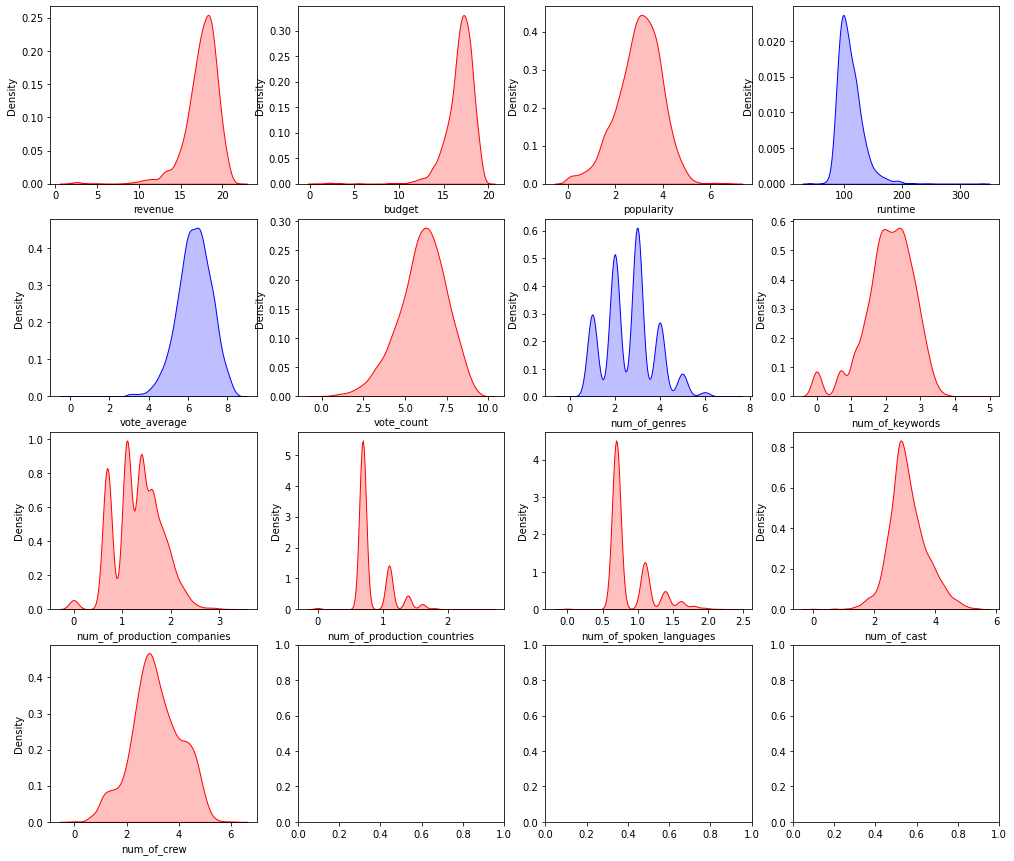

             <Skewness> 
[revenue] : -2.3528692922010075
[budget] : -3.1060573320982794
[popularity] : -0.39085006657604815
[runtime] : 1.6937575956631943
[vote_average] : -0.6078883476953402
[vote_count] : -0.5109641150154453
[num_of_genres] : 0.3757656595561392
[num_of_keywords] : -0.724088786843312
[num_of_production_companies] : 0.07665275015606249
[num_of_production_countries] : 1.4922751221900532
[num_of_spoken_languages] : 1.4948982415358016
[num_of_cast] : 0.32819500246914357
[num_of_crew] : -0.067500453782168


In [389]:

data_logarithm = data_with_revenue.copy()

data_logarithm['revenue'] = np.log1p(data_logarithm['revenue'])
data_logarithm['budget'] = np.log1p(data_logarithm['budget'])
data_logarithm['popularity'] = np.log1p(data_logarithm['popularity'])
data_logarithm['vote_count'] = np.log1p(data_logarithm['vote_count'])
data_logarithm['num_of_keywords'] = np.log1p(data_logarithm['num_of_keywords'])
data_logarithm['num_of_production_companies'] = np.log1p(data_logarithm['num_of_production_companies'])
data_logarithm['num_of_production_countries'] = np.log1p(data_logarithm['num_of_production_countries'])
data_logarithm['num_of_spoken_languages'] = np.log1p(data_logarithm['num_of_spoken_languages'])
data_logarithm['num_of_cast'] = np.log1p(data_logarithm['num_of_cast'])
data_logarithm['num_of_crew'] = np.log1p(data_logarithm['num_of_crew'])
f, axes = plt.subplots(4, 4, figsize=(17, 15))


sns.kdeplot(data_logarithm["revenue"],shade = True, color="red", ax=axes[0, 0])
sns.kdeplot(data_logarithm["budget"], shade = True,color="red", ax=axes[0, 1])
sns.kdeplot(data_logarithm["popularity"], shade = True,color="red", ax=axes[0, 2])
sns.kdeplot(data_logarithm["runtime"], shade = True,color="blue", ax=axes[0, 3])
sns.kdeplot(data_logarithm["vote_average"],shade = True, color="blue", ax=axes[1, 0])
sns.kdeplot(data_logarithm["vote_count"], shade = True,color="red", ax=axes[1, 1])
sns.kdeplot(data_logarithm["num_of_genres"], shade = True,color="blue", ax=axes[1, 2])
sns.kdeplot(data_logarithm["num_of_keywords"],shade = True, color="red", ax=axes[1, 3])
sns.kdeplot(data_logarithm["num_of_production_companies"],shade = True, color="red", ax=axes[2, 0])
sns.kdeplot(data_logarithm["num_of_production_countries"],shade = True, color="red", ax=axes[2, 1])
sns.kdeplot(data_logarithm["num_of_spoken_languages"],shade = True, color="red", ax=axes[2, 2])
sns.kdeplot(data_logarithm["num_of_cast"],shade = True, color="red", ax=axes[2, 3])
sns.kdeplot(data_logarithm["num_of_crew"],shade = True, color="red", ax=axes[3, 0])

plt.show()

print("             <Skewness> ")
print("[revenue] :", scipy.stats.skew(data_logarithm['revenue']))
print("[budget] :", scipy.stats.skew(data_logarithm['budget']))
print("[popularity] :", scipy.stats.skew(data_logarithm['popularity']))
print("[runtime] :", scipy.stats.skew(data_logarithm['runtime']))
print("[vote_average] :", scipy.stats.skew(data_logarithm['vote_average']))
print("[vote_count] :", scipy.stats.skew(data_logarithm['vote_count']))
print("[num_of_genres] :", scipy.stats.skew(data_logarithm['num_of_genres']))
print("[num_of_keywords] :", scipy.stats.skew(data_logarithm['num_of_keywords']))
print("[num_of_production_companies] :", scipy.stats.skew(data_logarithm['num_of_production_companies']))
print("[num_of_production_countries] :", scipy.stats.skew(data_logarithm['num_of_production_countries']))
print("[num_of_spoken_languages] :", scipy.stats.skew(data_logarithm['num_of_spoken_languages']))
print("[num_of_cast] :", scipy.stats.skew(data_logarithm['num_of_cast']))
print("[num_of_crew] :", scipy.stats.skew(data_logarithm['num_of_crew']))


In [390]:
data_logarithm[['revenue','budget','popularity','runtime','vote_average','vote_count','num_of_genres', 'num_of_keywords','num_of_production_companies','num_of_production_countries','num_of_spoken_languages','num_of_cast','num_of_crew' ]]

,revenue,budget,popularity,runtime,vote_average,vote_count,num_of_genres,num_of_keywords,num_of_production_companies,num_of_production_countries,num_of_spoken_languages,num_of_cast,num_of_crew
0,21.748578,19.283571,5.020174,162.0,7.2,9.375940,4,3.091042,1.609438,1.098612,1.098612,4.430817,5.036953
1,20.683485,19.519293,4.942232,169.0,6.9,8.412055,3,2.833213,1.386294,0.693147,0.693147,3.555348,3.496508
2,20.596199,19.316769,4.685614,148.0,6.3,8.404472,3,2.079442,1.386294,1.098612,1.791759,4.430817,5.049856
3,20.804790,19.336971,4.730153,165.0,7.6,9.116799,4,3.091042,1.609438,0.693147,0.693147,5.068904,5.384495
4,19.464974,19.376192,3.805039,132.0,6.1,7.661527,3,2.833213,0.693147,0.693147,0.693147,3.332205,4.890349
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,14.963272,10.203629,3.032482,92.0,7.4,6.628041,1,1.386294,1.098612,0.693147,0.693147,2.772589,2.079442
4788,15.607270,9.392745,1.714454,93.0,6.2,4.709530,3,2.890372,0.693147,0.693147,0.693147,2.484907,2.079442
4792,11.502885,9.903538,0.192637,111.0,7.4,4.158883,4,2.890372,0.693147,0.693147,0.693147,2.772589,1.098612
4796,12.959282,8.853808,3.190803,77.0,6.9,6.490724,3,2.302585,0.693147,0.693147,0.693147,2.995732,1.945910


In [391]:
#Standardization
from sklearn.preprocessing import StandardScaler

data_logarithm_zscore = data_logarithm[['revenue','budget','popularity','runtime','vote_average','vote_count','num_of_genres', 'num_of_keywords','num_of_production_companies','num_of_production_countries','num_of_spoken_languages','num_of_cast','num_of_crew' ]]
standardScaler = StandardScaler()
standardScaler.fit(data_logarithm_zscore)
data_logarithm_zscore[:] = standardScaler.transform(data_logarithm_zscore[:])
data_logarithm_zscore


,revenue,budget,popularity,runtime,vote_average,vote_count,num_of_genres,num_of_keywords,num_of_production_companies,num_of_production_countries,num_of_spoken_languages,num_of_cast,num_of_crew
0,2.048371,1.494788,2.157033,2.446071,1.019332,2.298651,1.205433,1.430936,0.607627,1.002711,0.744081,2.174657,2.019212
1,1.535923,1.636657,2.073929,2.780001,0.675987,1.635445,0.312079,1.064167,0.138066,-0.535028,-0.597321,0.755598,0.390492
2,1.493927,1.514768,1.800313,1.778210,-0.010704,1.630228,0.312079,-0.008093,0.138066,1.002711,3.037224,2.174657,2.032855
3,1.594286,1.526927,1.847803,2.589184,1.477126,2.120348,1.205433,1.430936,0.607627,-0.535028,-0.597321,3.208942,2.386670
4,0.949661,1.550532,0.861409,1.014940,-0.239601,1.119041,0.312079,1.064167,-1.320524,-0.535028,-0.597321,0.393901,1.864208
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,-1.216242,-3.969949,0.037678,-0.893234,1.248229,0.407945,-1.474629,-0.994113,-0.467304,-0.535028,-0.597321,-0.513188,-1.107779
4788,-0.906395,-4.457978,-1.367654,-0.845530,-0.125153,-0.912097,0.312079,1.145476,-1.320524,-0.535028,-0.597321,-0.979496,-1.107779
4792,-2.881137,-4.150559,-2.990275,0.013149,1.248229,-1.290972,1.205433,1.145476,-1.320524,-0.535028,-0.597321,-0.513188,-2.144814
4796,-2.180421,-4.782335,0.206487,-1.608799,0.675987,0.313463,0.312079,0.309335,-1.320524,-0.535028,-0.597321,-0.151492,-1.248962


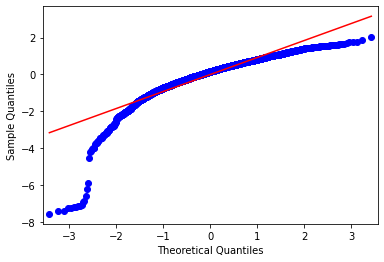

In [392]:
#QQ-plot
qq = sm.qqplot(data_logarithm_zscore['revenue'], line = 'r')
plt.show()

# Correlation

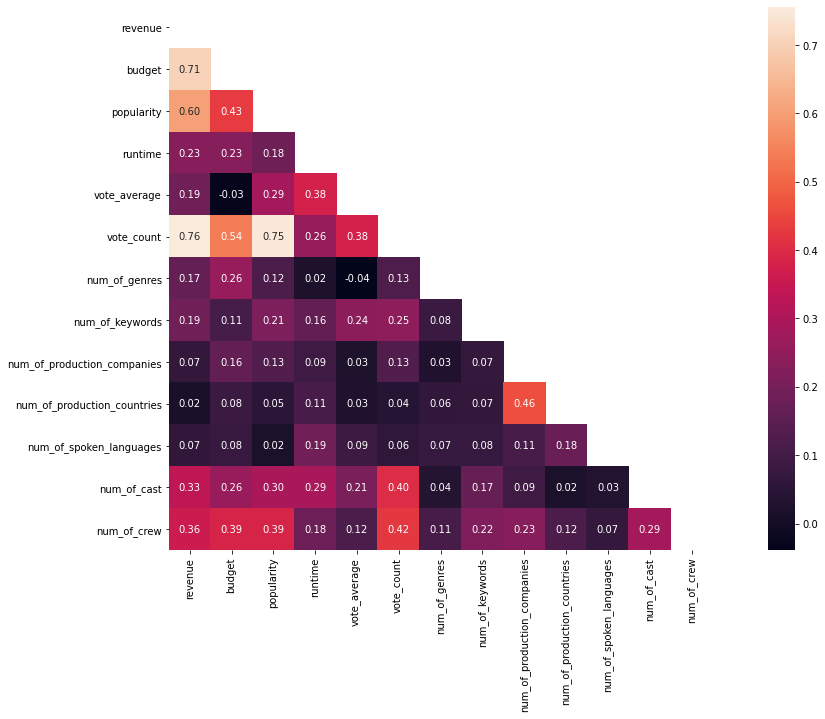

In [393]:
#Correlation before data scaling
data_continuous_before_norm = data_with_revenue[['revenue','budget','popularity','runtime','vote_average','vote_count','num_of_genres', 'num_of_keywords','num_of_production_companies','num_of_production_countries','num_of_spoken_languages','num_of_cast','num_of_crew' ]]

corr = data_continuous_before_norm.corr(method = 'pearson')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True,mask = mask , fmt=".2f",square = True, linecolor = "white")


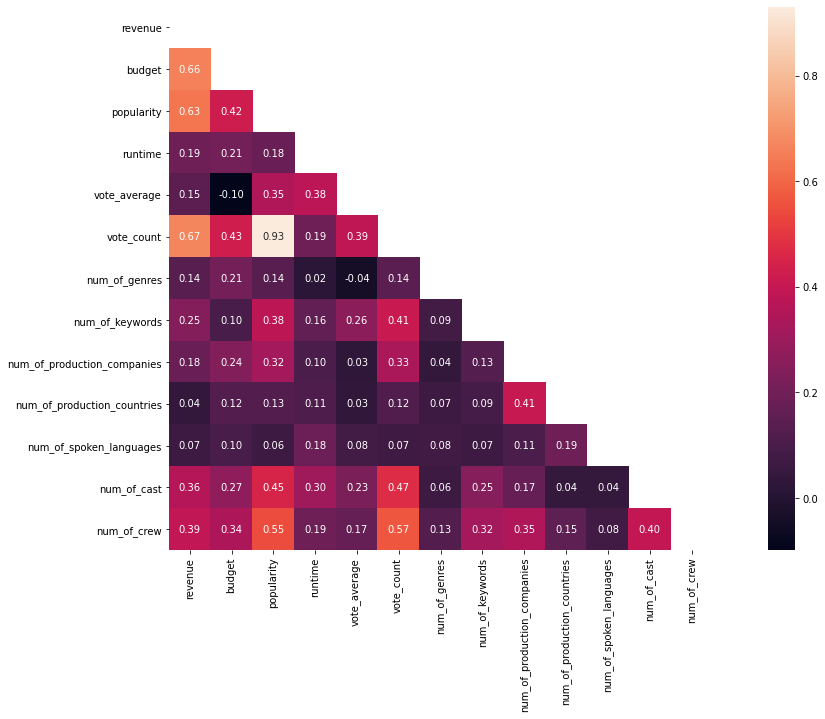

In [394]:
#Correlation after data scaling
corr = data_logarithm_zscore.corr(method = 'pearson')

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True,mask = mask , fmt=".2f",square = True, linecolor = "white")


Text(0.5, 1.0, 'Scatter plot between revenue and num_of_spoken_languages')

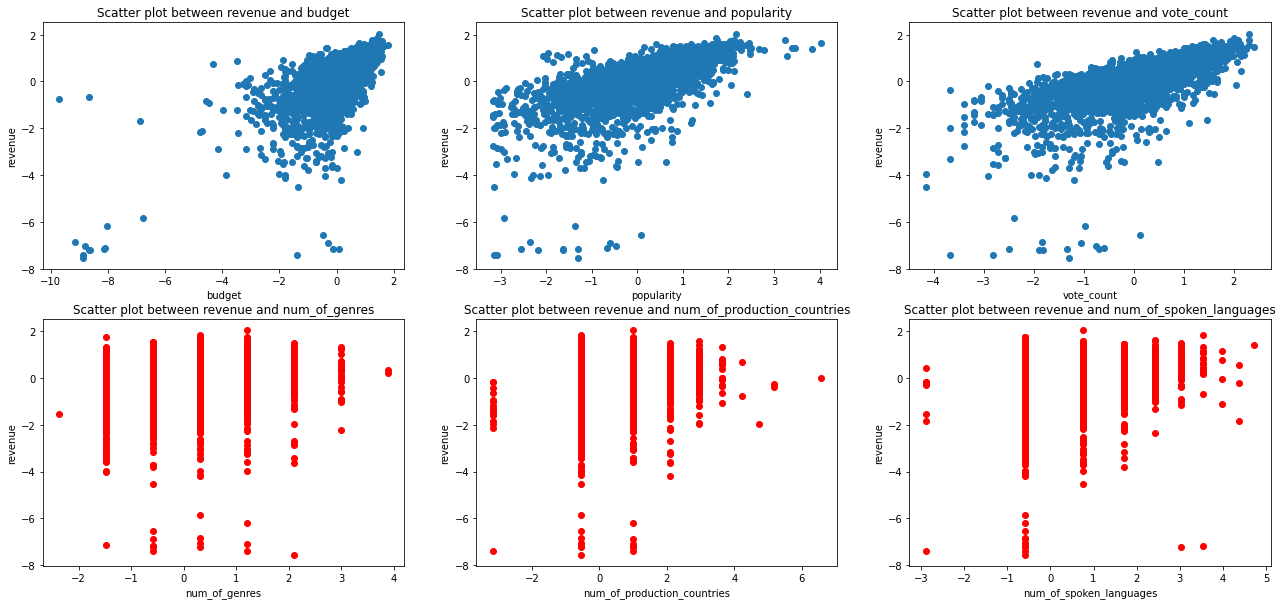

In [395]:
#Top 3 correlated variables with revenue
fig = plt.figure(figsize=(22, 10)) 
plt.subplot(2,3,1).scatter(x = data_logarithm_zscore['budget'], y = data_logarithm_zscore['revenue']) 
plt.xlabel("budget") 
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and budget')

plt.subplot(2,3,2).scatter(x = data_logarithm_zscore['popularity'], y =data_logarithm_zscore['revenue']) 
plt.xlabel("popularity") 
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and popularity')

plt.subplot(2,3,3).scatter(x = data_logarithm_zscore['vote_count'], y =data_logarithm_zscore['revenue']) 
plt.xlabel("vote_count")
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and vote_count')

#Bottom 3 correlated variables with revenue
plt.subplot(2,3,4).scatter(x = data_logarithm_zscore['num_of_genres'], y = data_logarithm_zscore['revenue'],c = 'red') 
plt.xlabel("num_of_genres") 
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and num_of_genres')

plt.subplot(2,3,5).scatter(x = data_logarithm_zscore['num_of_production_countries'], y =data_logarithm_zscore['revenue'],c = 'red') 
plt.xlabel("num_of_production_countries") 
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and num_of_production_countries')

plt.subplot(2,3,6).scatter(x = data_logarithm_zscore['num_of_spoken_languages'], y =data_logarithm_zscore['revenue'],c = 'red') 
plt.xlabel("num_of_spoken_languages")
plt.ylabel("revenue") 
plt.title('Scatter plot between revenue and num_of_spoken_languages')

#scatter plot

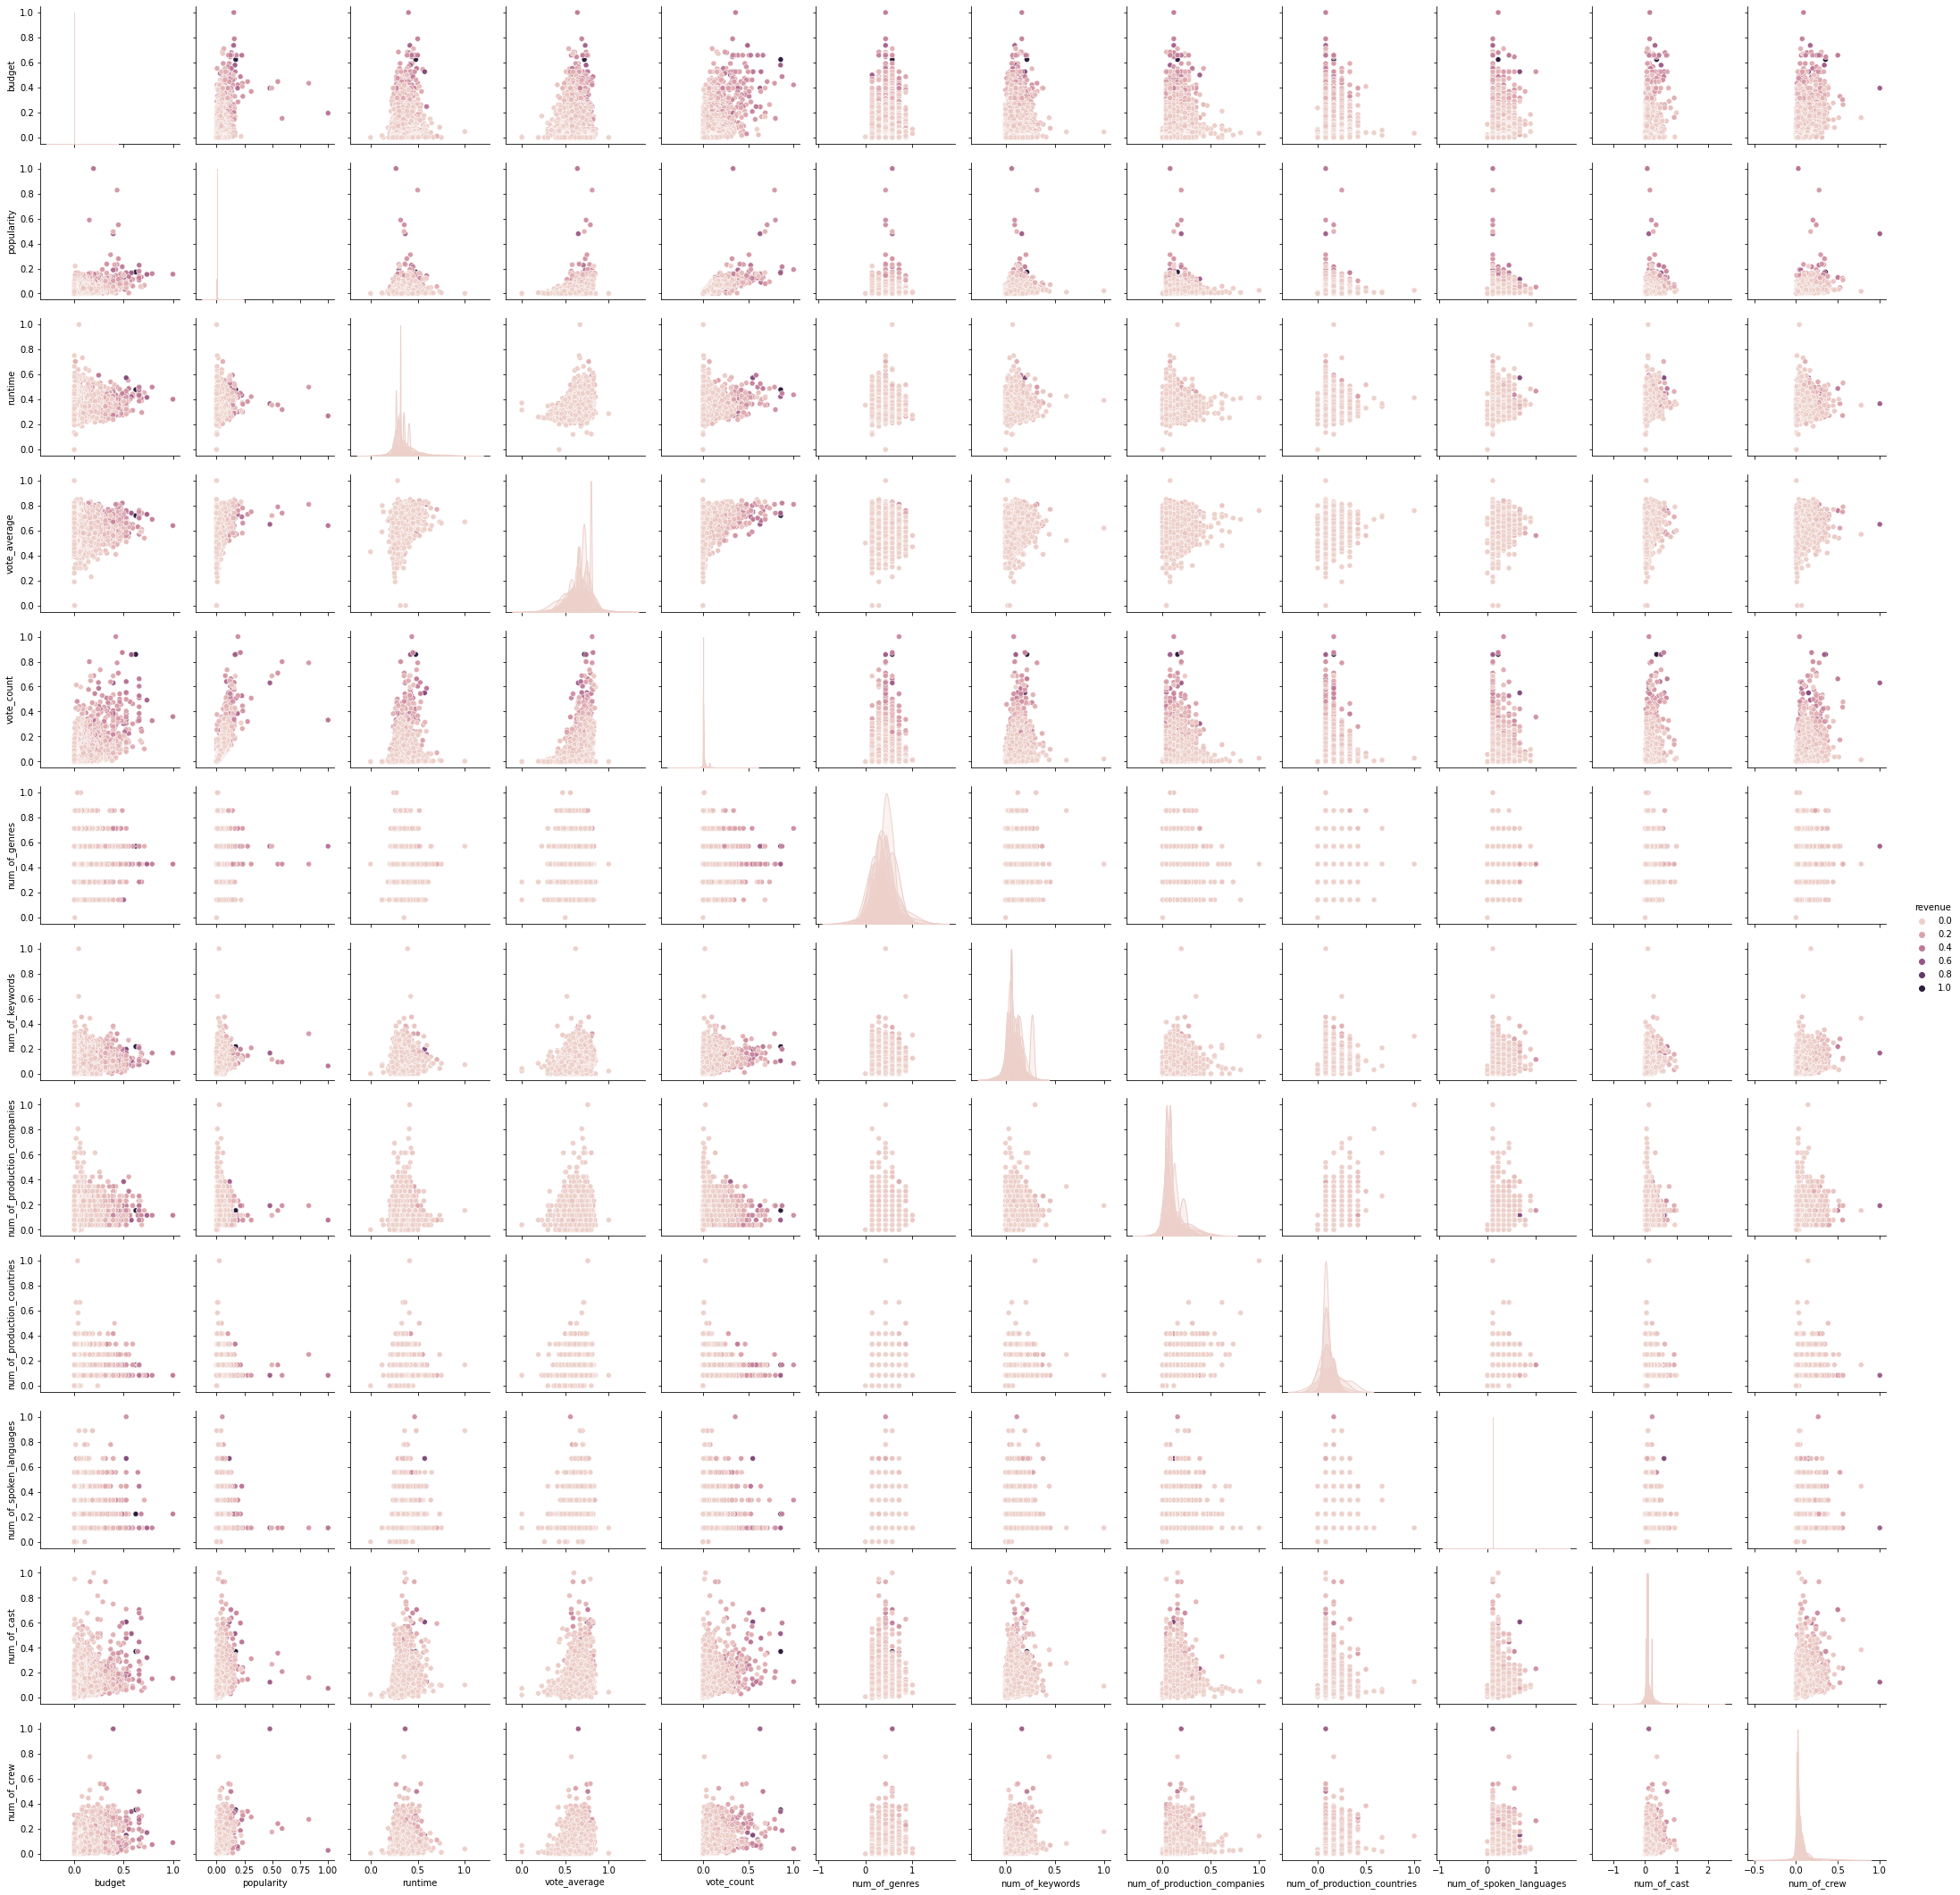

In [ ]:
sns.pairplot(data_continuous, hue="revenue")


plt.show()


#Regression modeling (Feature Selection through simplest regression model)

- check Multicollinearity

In [396]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


y,x = dmatrices("revenue ~   budget +	popularity +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries	+ num_of_spoken_languages	+ num_of_cast	+ num_of_crew	", data=data_logarithm_zscore, return_type = "dataframe")

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,1.0,Intercept
1,1.5,budget
2,7.6,popularity
3,1.4,runtime
4,1.6,vote_average
5,8.6,vote_count
6,1.1,num_of_genres
7,1.3,num_of_keywords
8,1.4,num_of_production_companies
9,1.2,num_of_production_countries


- popularity and vote_count seems having multicollinearity, but they are all less than 10, so we should keep on eye on them, and do not remove now.
- If the multicollinearity is problem, we should do dimension reduction like PCA analysis or SVM.

In [397]:
#Feature Selection (Backward stepwise)
#remove features if its p-value less than 0.05 (95% confidence level.)

def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries	+ num_of_spoken_languages	+ num_of_cast	+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     355.6
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:51:52   Log-Likelihood:                -2426.7
No. Observations:                2583   AIC:                             4879.
Df Residuals:                    2570   BIC:                             4956.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

- remove num_of_spoken_languages

In [398]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries	+ num_of_cast	+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     388.1
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:51:55   Log-Likelihood:                -2426.7
No. Observations:                2583   AIC:                             4877.
Df Residuals:                    2571   BIC:                             4948.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

- remove num_of_spoken_cast

In [399]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +	popularity +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries		+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     427.0
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:51:58   Log-Likelihood:                -2426.9
No. Observations:                2583   AIC:                             4876.
Df Residuals:                    2572   BIC:                             4940.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

- remove popularity

In [400]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +runtime	+ vote_average	+ vote_count	+ num_of_genres	+ num_of_keywords +	num_of_production_companies	+ num_of_production_countries		+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     474.5
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:52:01   Log-Likelihood:                -2427.0
No. Observations:                2583   AIC:                             4874.
Df Residuals:                    2573   BIC:                             4933.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

- remove num_of_keywords 

In [401]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +runtime	+ vote_average	+ vote_count	+ num_of_genres	 +	num_of_production_companies	+ num_of_production_countries		+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     533.4
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:52:04   Log-Likelihood:                -2428.0
No. Observations:                2583   AIC:                             4874.
Df Residuals:                    2574   BIC:                             4927.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

- remove vote_average

In [402]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget +runtime		+ vote_count	+ num_of_genres	 +	num_of_production_companies	+ num_of_production_countries		+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     609.2
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:52:06   Log-Likelihood:                -2428.9
No. Observations:                2583   AIC:                             4874.
Df Residuals:                    2575   BIC:                             4921.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

- remove runtime

In [403]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget 		+ vote_count	+ num_of_genres	 +	num_of_production_companies	+ num_of_production_countries		+ num_of_crew", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     709.7
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:52:09   Log-Likelihood:                -2430.3
No. Observations:                2583   AIC:                             4875.
Df Residuals:                    2576   BIC:                             4916.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

- remove num_of_crew

In [404]:
def get_model1(seed):
    df_train, df_test = train_test_split(data_logarithm_zscore, test_size=0.2, random_state=seed)
    model = sm.OLS.from_formula("revenue ~  budget 	+ vote_count	+ num_of_genres	 +	num_of_production_companies	+ num_of_production_countries	", data=df_train)
    return df_train, df_test, model.fit()


df_train, df_test, result1 = get_model1(3)
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     850.6
Date:                Wed, 30 Jun 2021   Prob (F-statistic):               0.00
Time:                        20:52:11   Log-Likelihood:                -2431.6
No. Observations:                2583   AIC:                             4875.
Df Residuals:                    2577   BIC:                             4910.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

- This is final selected features.
- Now I'll use these features for modeling

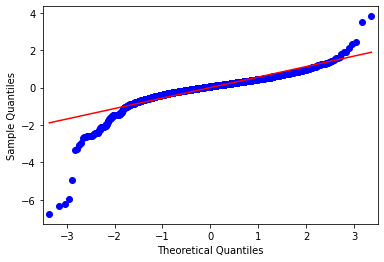

In [405]:
qq = sm.qqplot(result1.resid, line = 'r')
plt.show()

In [406]:
RMSE = np.sqrt((result1.resid **2).mean())
RMSE

0.6203113171915299

#Train,Test Data

In [407]:
#select features for training and testing
train_features  = df_train[["budget","vote_count","num_of_genres",	"num_of_production_companies", "num_of_production_countries"] ]
train_target = df_train['revenue']

test_features = df_test[["budget","vote_count","num_of_genres",	"num_of_production_companies", "num_of_production_countries"] ]
test_target = df_test['revenue']

I used 3 models.
1. Linear Regression
2. Lidge Regression :  we add a penalty term which is equal to the square of the coefficient in the linear Regression.
alpha which is hyper parameter in this model determines how much regulize the model.(L2 regularization)
3. ElasticNet Regression : Lidge regression + Lasso regression. The regulation term is used by simply adding the regulation terms of ridge and regression, and the degree of mixing of the two regulation terms is adjusted using the mixing ratio r.

The reason why I used ElasticNet Regression is that the number of data is not much, and some variables seemed to have multicollinearity.
(If I use Lasso, if some variables have multicollinearity, it select one variables between them).

- referenced by https://www.geeksforgeeks.org/lasso-vs-ridge-vs-elastic-net-ml/ and https://yganalyst.github.io/ml/ML_chap3-4/


#Linear Regression(sklearn)

In [408]:
from sklearn import linear_model
linear = linear_model.LinearRegression()

model = linear.fit(train_features,train_target)
print(linear.score(train_features,train_target)) # train accuracy
print(linear.score(test_features,test_target)) # test accuracy


0.6226805818331442
0.6450342866492442


In [409]:
from sklearn.metrics import mean_squared_error
#train RMSE

pred_y = model.predict(train_features)
mse = mean_squared_error(train_target, pred_y)
rmse = np.sqrt(mse)

rmse

0.6203113171915301

In [410]:
#test RMSE
pred_y = model.predict(test_features)
mse = mean_squared_error(test_target, pred_y)
rmse = np.sqrt(mse)

rmse

0.571712766706518

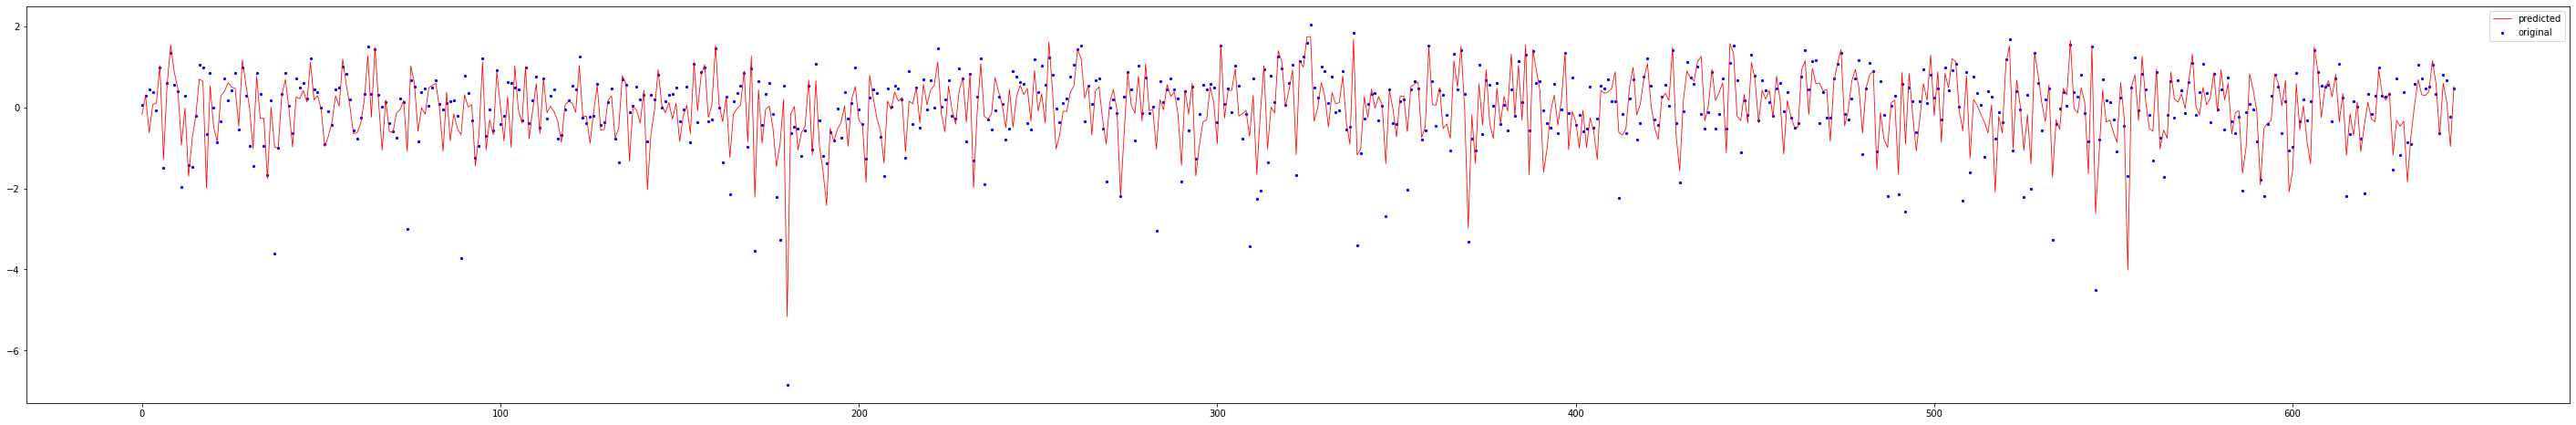

In [411]:
linear_prediction = linear.predict(test_features)

fig = plt.figure(figsize = (50,8))

x_ax = range(len(test_features))
plt.scatter(x_ax, test_target, s=5, color="blue", label="original")
plt.plot(x_ax, linear_prediction, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [412]:
#find the coefficient of the linear regression model

df = pd.DataFrame() 
names = ["budget","vote_count","num_of_genres",	"num_of_production_companies", "num_of_production_countries"] 
df['feature'] = names  
df['coefficient'] = linear.coef_.flatten() 
df = df.set_index('feature') 
df


,coefficient
feature,
budget,0.474134
vote_count,0.512533
num_of_genres,-0.032761
num_of_production_companies,-0.080929
num_of_production_countries,-0.043366


In [413]:
#find the intercept of the linear regression model
linear.intercept_

-0.006389565537345397

- Y  = 0.4741*(budget) + 0.5125(vote_count) – 0.0328(num_of_genre) –0.0809(num_of_production_companies) – 0.0434(num_of_production_countries)-0.0064


#Ridge Regression

In [414]:
from sklearn.linear_model import Ridge


In [415]:
#Find best alpha value

from sklearn.metrics import mean_squared_error
x = train_features
y = train_target
for a in alpha_list:
  model = Ridge(alpha=a).fit(x,y)
  score = model.score(x, y)
  pred_y = model.predict(x)
  mse = mean_squared_error(y, pred_y)
  print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
  .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0010, R2:0.62, MSE:0.38, RMSE:0.62
Alpha:0.0100, R2:0.62, MSE:0.38, RMSE:0.62
Alpha:0.1000, R2:0.62, MSE:0.38, RMSE:0.62
Alpha:1.0000, R2:0.62, MSE:0.38, RMSE:0.62
Alpha:10.0000, R2:0.62, MSE:0.38, RMSE:0.62
Alpha:100.0000, R2:0.62, MSE:0.39, RMSE:0.62
Alpha:1000.0000, R2:0.59, MSE:0.42, RMSE:0.65


In [416]:
ridge = Ridge(alpha = 0.1)

ridge.fit(train_features,train_target)
print(ridge.score(train_features,train_target))
print(ridge.score(test_features,test_target)) # accuracy

0.6226805811549838
0.6450370689481226


In [417]:
model = ridge
pred_y = model.predict(train_features)
mse = mean_squared_error(train_target, pred_y)
rmse = np.sqrt(mse)

rmse

0.6203113177489763

In [418]:
pred_y = model.predict(test_features)
mse = mean_squared_error(test_target, pred_y)
rmse = np.sqrt(mse)

rmse

0.571710526097289

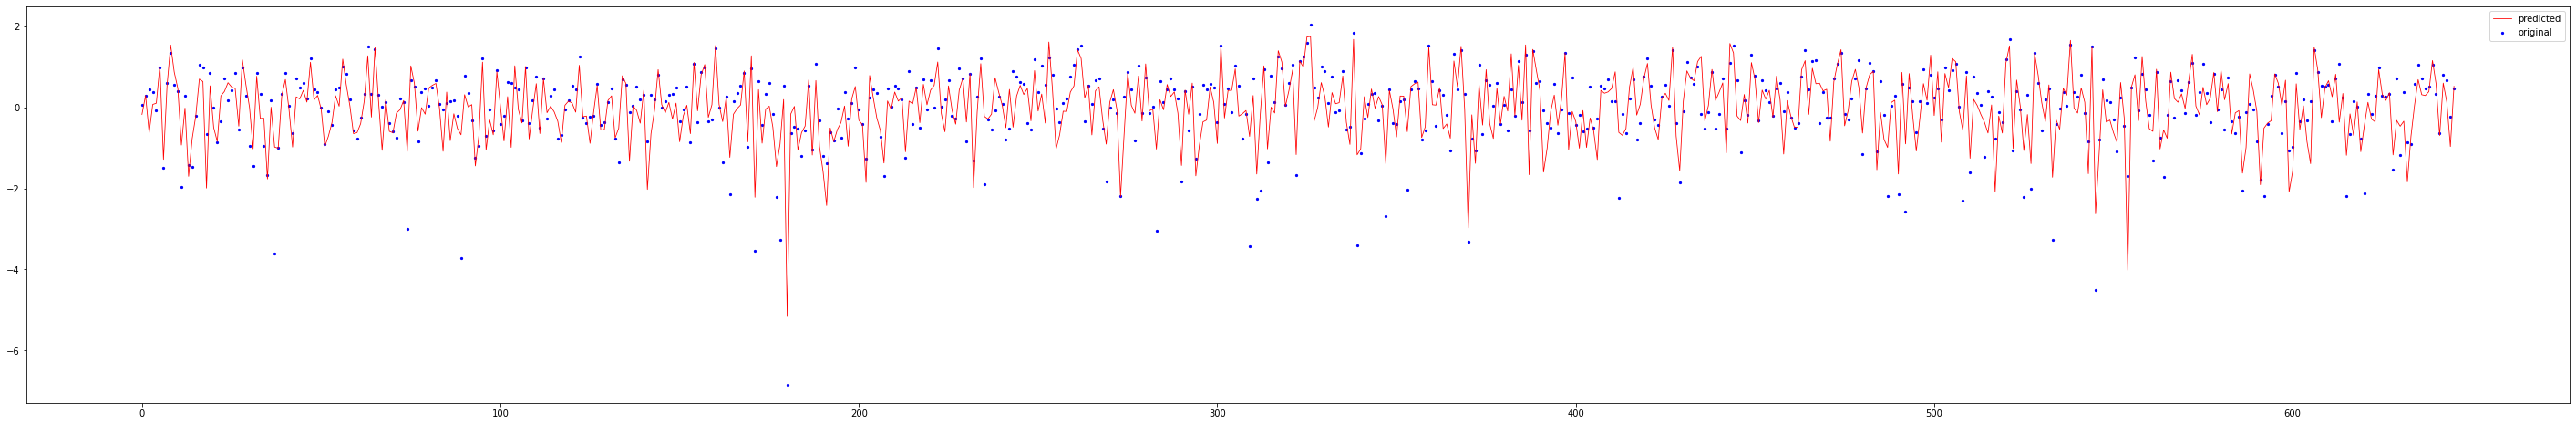

In [419]:
ridge_prediction = ridge.predict(test_features)

fig = plt.figure(figsize = (50,8))

x_ax = range(len(test_features))
plt.scatter(x_ax, test_target, s=5, color="blue", label="original")
plt.plot(x_ax, ridge_prediction, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [420]:
#find the coefficient of the ridge regression model
df = pd.DataFrame() 
names = ["budget","vote_count","num_of_genres",	"num_of_production_companies", "num_of_production_countries"] 
df['feature'] = names  
df['coefficient'] = ridge.coef_.flatten() 
df = df.set_index('feature') 
df


,coefficient
feature,
budget,0.474120
vote_count,0.512514
num_of_genres,-0.032755
num_of_production_companies,-0.080917
num_of_production_countries,-0.043366


In [421]:
#find the intercept of the ridge regression model
ridge.intercept_

-0.006389412459646422

Y  = 0.4741*(budget) + 0.5124(vote_count) – 0.0327(num_of_genre) –0.0809(num_of_production_companies) – 0.0434(num_of_production_countries)-0.0064


#ElasticNet

In [422]:
from sklearn.linear_model import ElasticNet

#find best alpha in ElasticNet

alpha_list = [0.001,0.01,0.1,1,10,100, 1000]
for a in alpha_list:
  model = ElasticNet(alpha=a).fit(x,y)
  score = model.score(x, y)
  pred_y = model.predict(x)
  mse = mean_squared_error(y, pred_y)
  print("Alpha:{0:.4f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
  .format(a, score, mse, np.sqrt(mse)))

Alpha:0.0010, R2:0.62, MSE:0.38, RMSE:0.62
Alpha:0.0100, R2:0.62, MSE:0.39, RMSE:0.62
Alpha:0.1000, R2:0.61, MSE:0.40, RMSE:0.63
Alpha:1.0000, R2:0.20, MSE:0.81, RMSE:0.90
Alpha:10.0000, R2:0.00, MSE:1.02, RMSE:1.01
Alpha:100.0000, R2:0.00, MSE:1.02, RMSE:1.01
Alpha:1000.0000, R2:0.00, MSE:1.02, RMSE:1.01


In [429]:
elasticNet = ElasticNet(alpha = 0.01, l1_ratio = 0.5)

elasticNet.fit(train_features,train_target)
print(elasticNet.score(train_features,train_target))# train accuracy
print(elasticNet.score(test_features,test_target)) # test accuracy


0.6224668434010228
0.646128306138653


In [430]:
#train RMSE

model = elasticNet
pred_y = model.predict(train_features)
mse = mean_squared_error(train_target, pred_y)
rmse = np.sqrt(mse)

rmse

0.6204869847972504

In [425]:
#test RMSE
pred_y = model.predict(test_features)
mse = mean_squared_error(test_target, pred_y)
rmse = np.sqrt(mse)

rmse

0.570831065239217

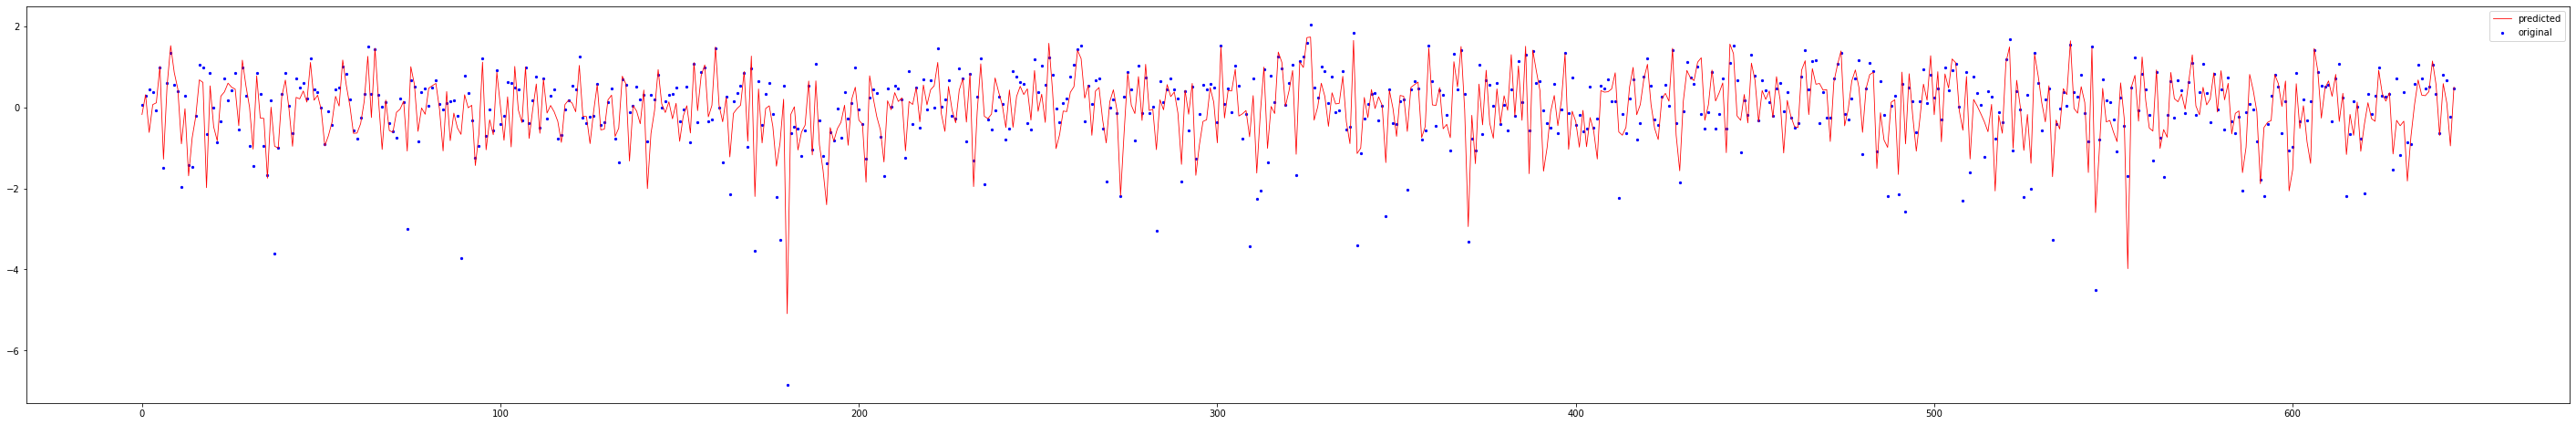

In [426]:
elasticNet_prediction = elasticNet.predict(test_features)

fig = plt.figure(figsize = (50,8))

x_ax = range(len(test_features))
plt.scatter(x_ax, test_target, s=5, color="blue", label="original")
plt.plot(x_ax, elasticNet_prediction, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [427]:
#find the coefficient of the ElasticNet regression model
df = pd.DataFrame() 
names = ["budget","vote_count","num_of_genres",	"num_of_production_companies", "num_of_production_countries"] 
df['feature'] = names  
df['coefficient'] = elasticNet.coef_.flatten() 
df = df.set_index('feature') 
df


,coefficient
feature,
budget,0.466855
vote_count,0.503770
num_of_genres,-0.025425
num_of_production_companies,-0.072465
num_of_production_countries,-0.040354


In [428]:
#find the coefficient of the Intercept regression model
elasticNet.intercept_

-0.006326669502023015

Y  = 0.4668*(budget) + 0.503(vote_count) – 0.025(num_of_genre) –0.0724(num_of_production_companies) – 0.0403(num_of_production_countries)-0.0064


#ANN
- I tried to classify revenues using artifical neural network.

In [ ]:
data_with_revenue['revenue'].describe()

count    3.229000e+03
mean     1.212430e+08
std      1.863029e+08
min      5.000000e+00
25%      1.700000e+07
50%      5.518472e+07
75%      1.462920e+08
max      2.787965e+09
Name: revenue, dtype: float64

- I labeled data like this
- revenue <= 5.518472e+07 , 0 (0~50%)
- 1.462920e+08 < revenue <= 5.518472e+07  , 1 (50%~75%)
- revenue >= 1.462920e+08 , 2 (75%~100%)


In [284]:
categorical_classification = data_with_revenue[["revenue","budget","popularity","vote_average",	"num_of_keywords"] ]

conditionlist = [
                 (categorical_classification['revenue'] >= 1.462920e+08) ,
                 (categorical_classification['revenue'] >= 5.518472e+07 ) & (categorical_classification['revenue'] <1.462920e+08),
                 (categorical_classification['revenue'] <= 5.518472e+07 )]
choicelist = [2,1,0]
categorical_classification['classification'] = np.select(conditionlist, choicelist, default=0)


categorical_classification = categorical_classification[["classification","revenue","budget","popularity","vote_average",	"num_of_keywords"] ]
categorical_classification


,classification,revenue,budget,popularity,vote_average,num_of_keywords
0,2,2787965087,237000000,150.437577,7.2,21
1,2,961000000,300000000,139.082615,6.9,16
2,2,880674609,245000000,107.376788,6.3,7
3,2,1084939099,250000000,112.312950,7.6,21
4,2,284139100,260000000,43.926995,6.1,16
...,...,...,...,...,...,...
4773,0,3151130,27000,19.748658,7.4,3
4788,0,6000000,12000,4.553644,6.2,17
4792,0,99000,20000,0.212443,7.4,17
4796,0,424760,7000,23.307949,6.9,9


      classification    revenue  ...  vote_average  num_of_keywords
0           1.506793  14.316125  ...      1.019332         1.883460
1           1.506793   4.508181  ...      0.675987         1.101390
2           1.506793   4.076960  ...     -0.010704        -0.306337
3           1.506793   5.173540  ...      1.477126         1.883460
4           1.506793   0.874497  ...     -0.239601         1.101390
...              ...        ...  ...           ...              ...
4773       -0.904823  -0.633968  ...      1.248229        -0.931994
4788       -0.904823  -0.618674  ...     -0.125153         1.257804
4792       -0.904823  -0.650354  ...      1.248229         1.257804
4796       -0.904823  -0.648605  ...      0.675987         0.006491
4798       -0.904823  -0.639928  ...      0.332641        -0.619165

[3229 rows x 6 columns]
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense

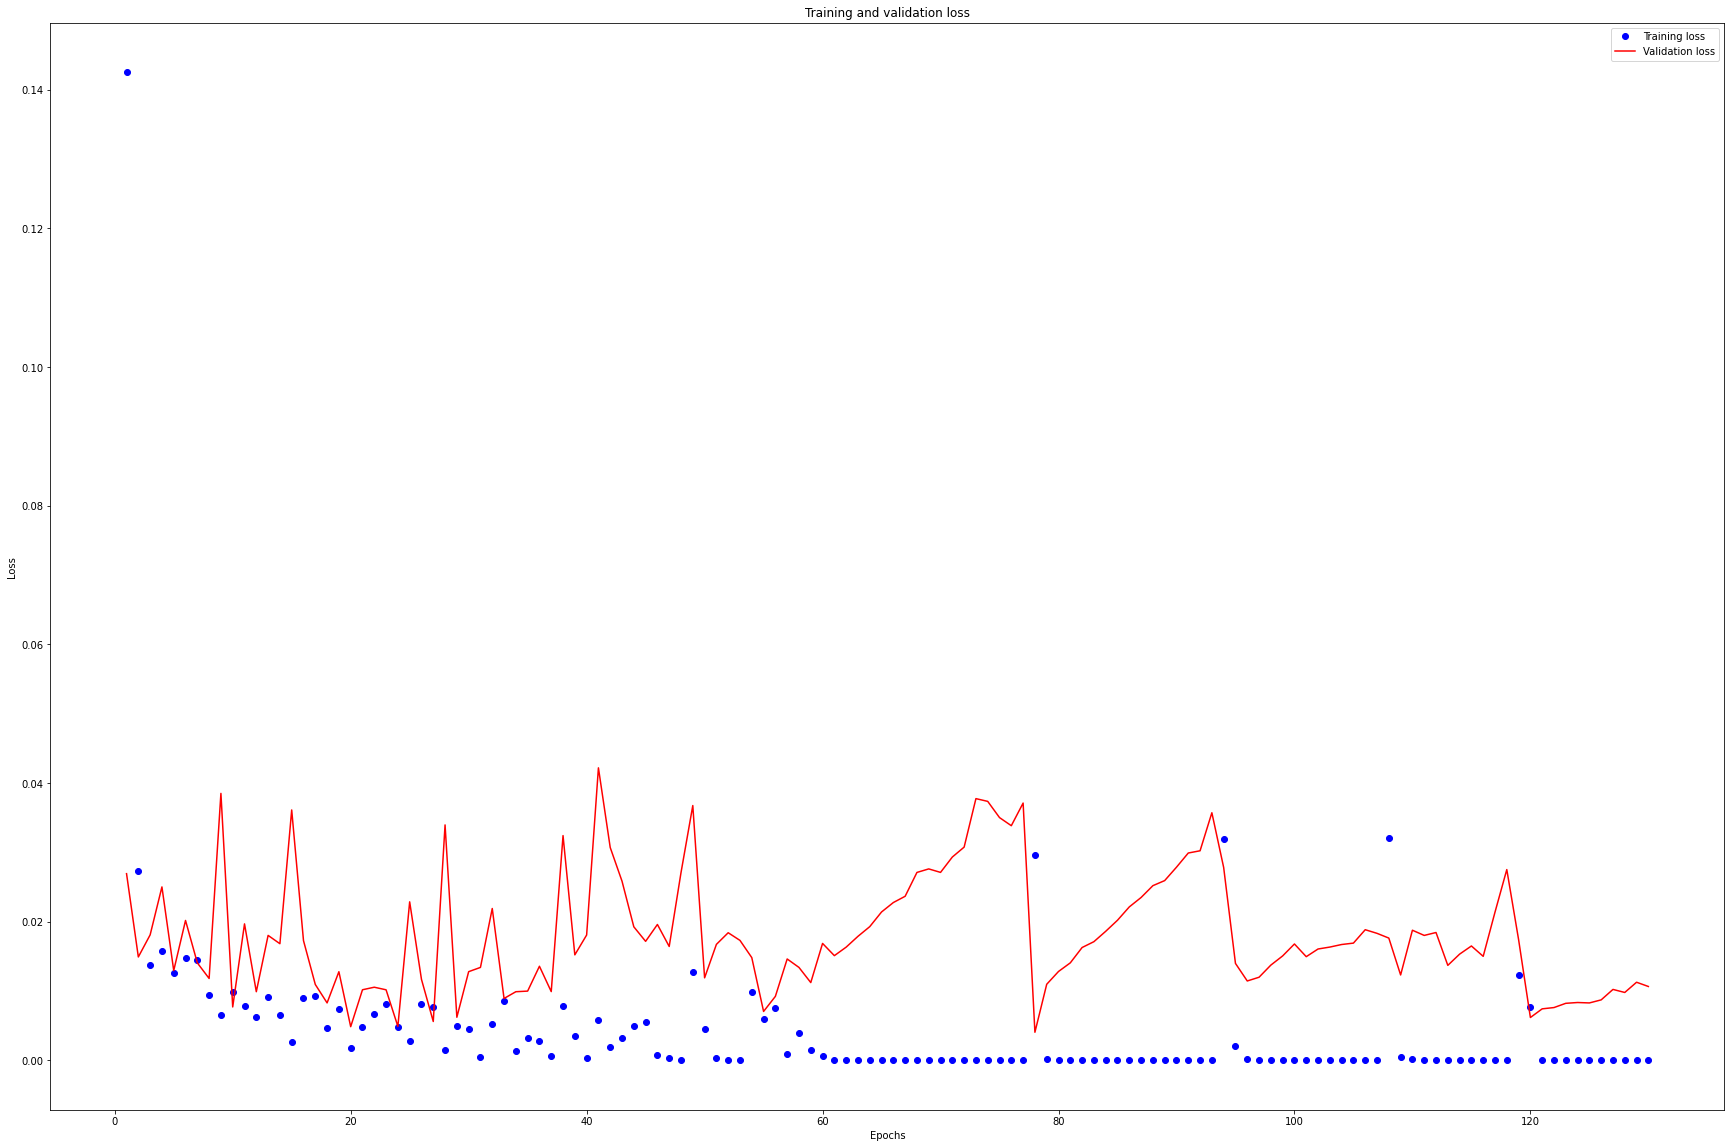

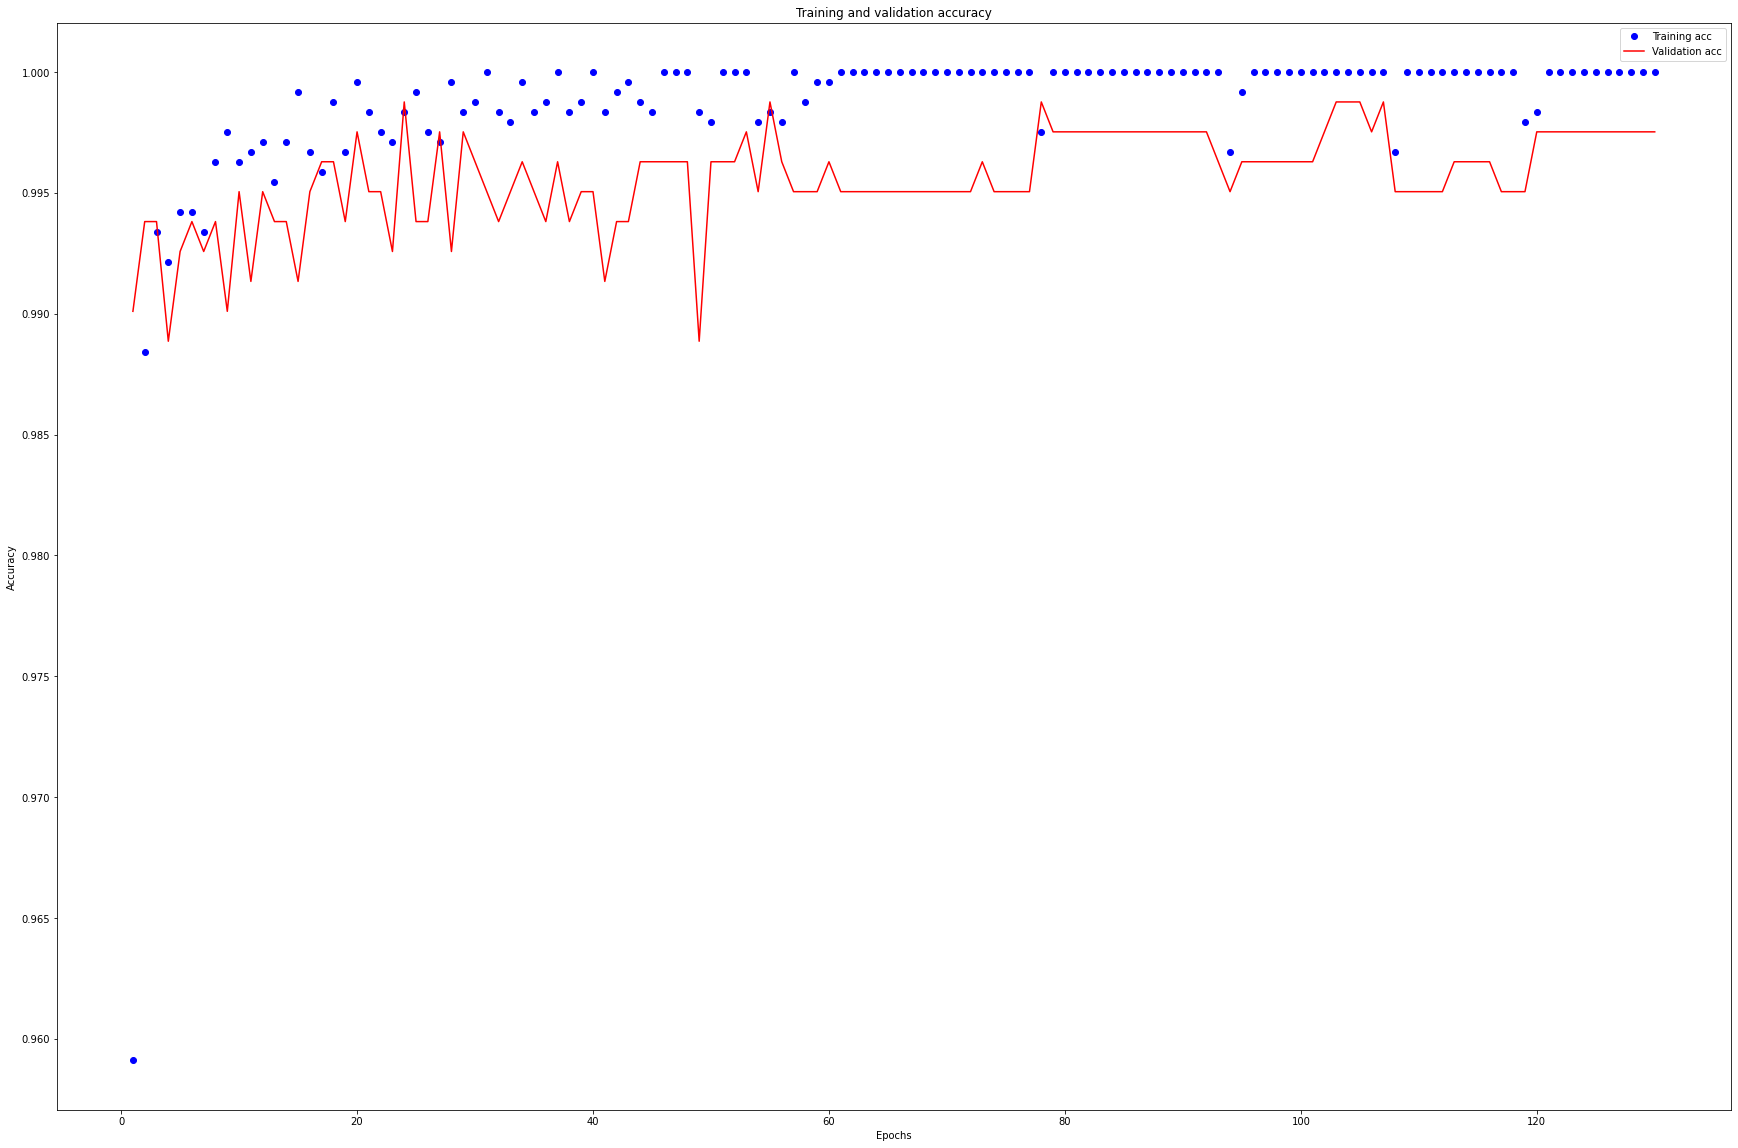

index:  234 actual y:  0 predicted y:  0
index:  456 actual y:  0 predicted y:  0
index:  456 actual y:  0 predicted y:  0
index:  377 actual y:  0 predicted y:  0
index:  589 actual y:  0 predicted y:  0
index:  276 actual y:  0 predicted y:  0
index:  344 actual y:  0 predicted y:  0
index:  550 actual y:  1 predicted y:  1
index:  770 actual y:  0 predicted y:  0
index:  40 actual y:  0 predicted y:  0
26/26 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 0.9975
loss:  0.010659213177859783
accuracy 0.9975247383117676


In [335]:
import numpy as np
import random
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

random.seed(777)

learning_rate = 0.0005
batch_size = 3
training_epochs = 130
nb_classes = 3
drop_rate = 0.0005

data1 = categorical_classification
print(data1)
standardScaler = StandardScaler()
standardScaler.fit(data1)
data1[:] = standardScaler.transform(data1[:])
data1

x = data1.iloc[:,1:5]
y = data1[['classification']]
x_train, x_test, y_train, y_test = train_test_split(x,y) 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()

tf.model.add(tf.keras.layers.Dense(input_dim=4, units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_train, y_train,epochs = training_epochs,batch_size = batch_size,validation_data=(x_test,y_test))

#Validation
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  
plt.plot(epochs, val_loss, 'r', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.rcParams['figure.figsize'] = (30,20)
plt.legend()

plt.show()

plt.clf() 
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])


- If you look at the loss graph, it seems overfitting.
- So I increase drop_out rate

      classification    revenue  ...  vote_average  num_of_keywords
0           1.506793  14.316125  ...      1.019332         1.883460
1           1.506793   4.508181  ...      0.675987         1.101390
2           1.506793   4.076960  ...     -0.010704        -0.306337
3           1.506793   5.173540  ...      1.477126         1.883460
4           1.506793   0.874497  ...     -0.239601         1.101390
...              ...        ...  ...           ...              ...
4773       -0.904823  -0.633968  ...      1.248229        -0.931994
4788       -0.904823  -0.618674  ...     -0.125153         1.257804
4792       -0.904823  -0.650354  ...      1.248229         1.257804
4796       -0.904823  -0.648605  ...      0.675987         0.006491
4798       -0.904823  -0.639928  ...      0.332641        -0.619165

[3229 rows x 6 columns]
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense

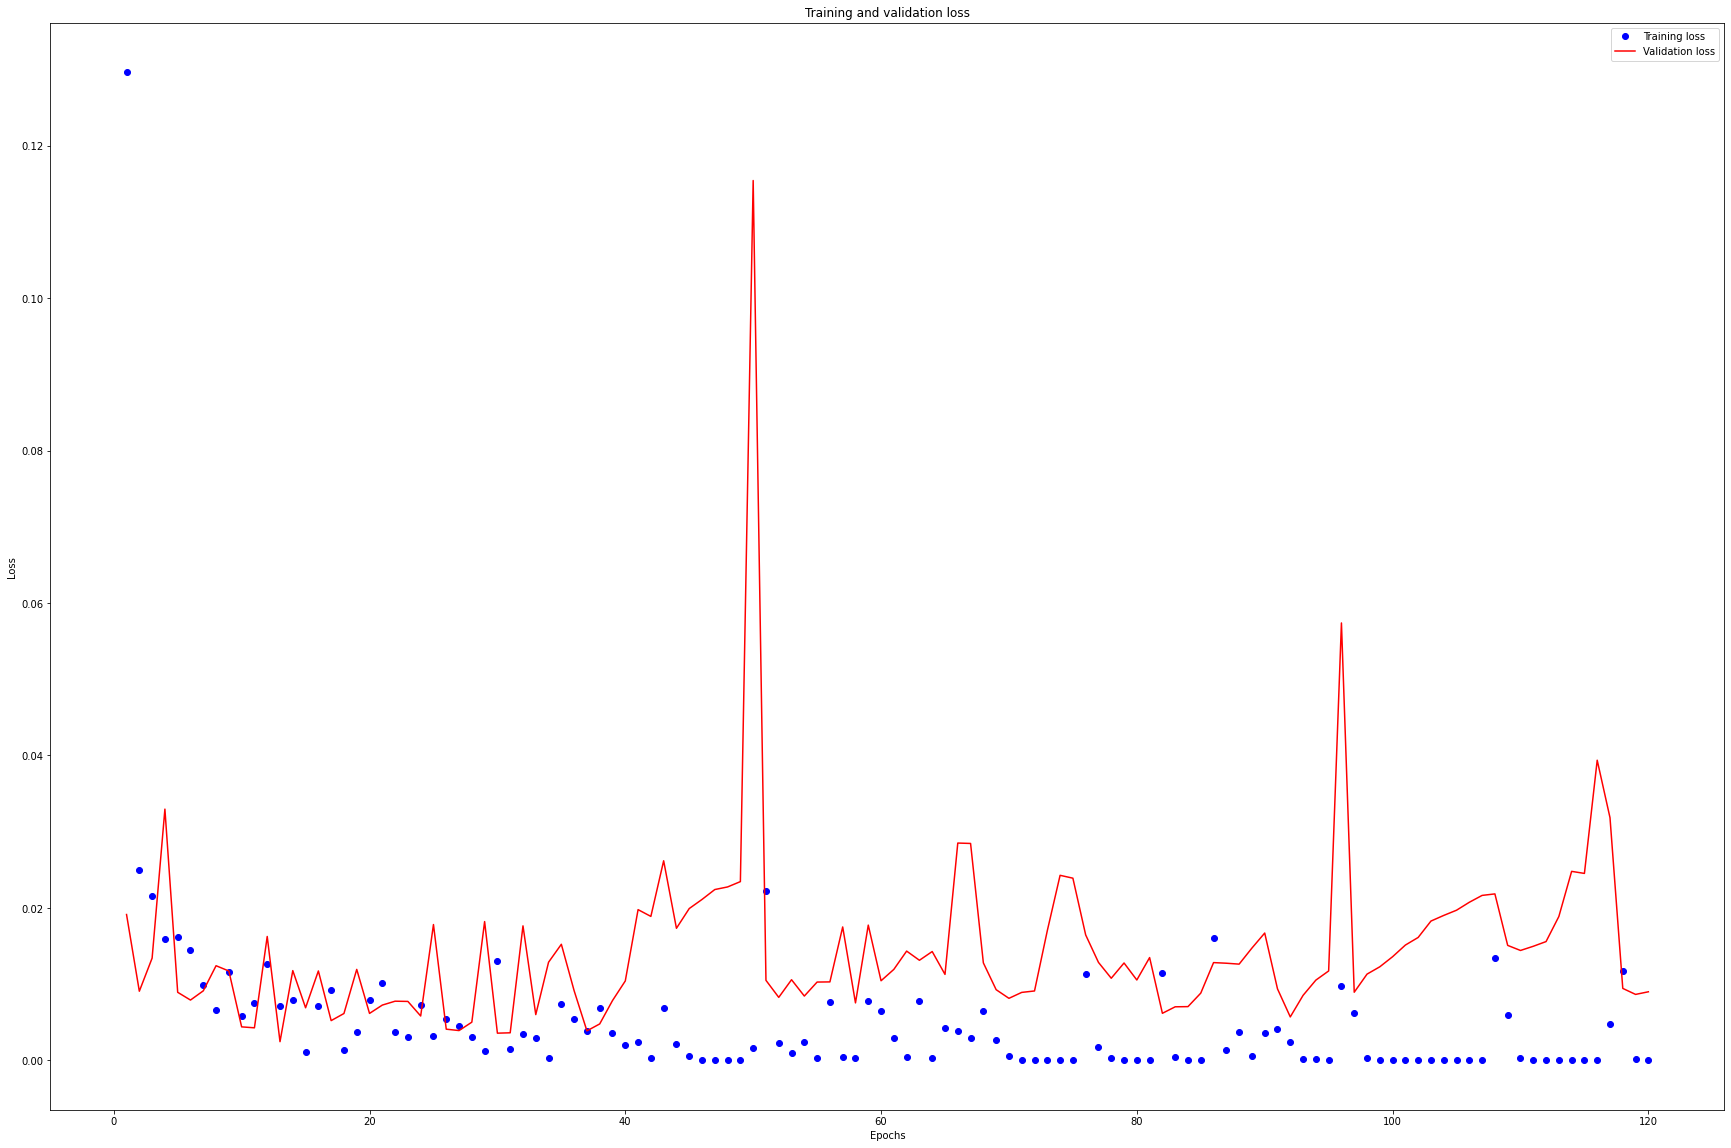

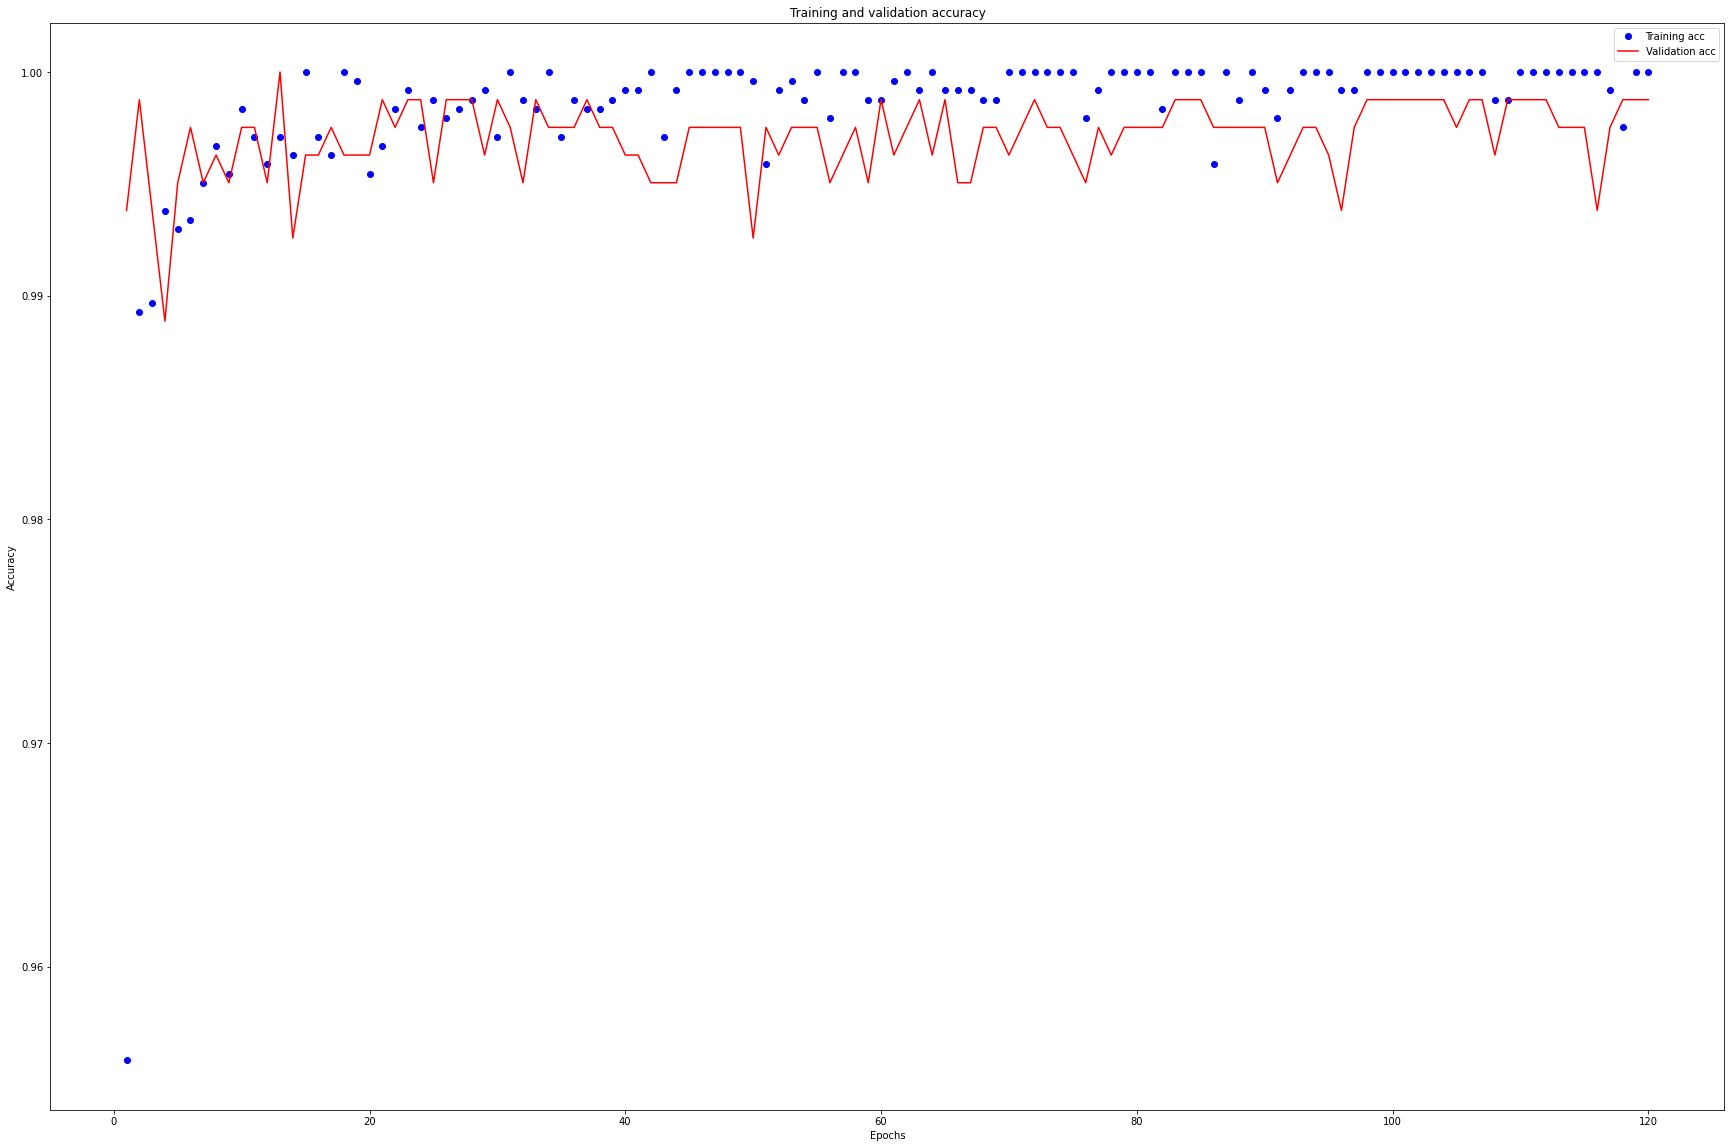

index:  234 actual y:  0 predicted y:  0
index:  456 actual y:  0 predicted y:  0
index:  456 actual y:  0 predicted y:  0
index:  377 actual y:  0 predicted y:  0
index:  589 actual y:  0 predicted y:  0
index:  276 actual y:  0 predicted y:  0
index:  344 actual y:  0 predicted y:  0
index:  550 actual y:  0 predicted y:  0
index:  770 actual y:  1 predicted y:  1
index:  40 actual y:  1 predicted y:  1
26/26 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9988
loss:  0.009000221267342567
accuracy 0.9987623691558838


In [287]:
import numpy as np
import random
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split

random.seed(777)

learning_rate = 0.0005
batch_size = 3
training_epochs = 120
nb_classes = 3
drop_rate = 0.005

data1 = categorical_classification
print(data1)
standardScaler = StandardScaler()
standardScaler.fit(data1)
data1[:] = standardScaler.transform(data1[:])
data1

x = data1.iloc[:,1:5]
y = data1[['classification']]
x_train, x_test, y_train, y_test = train_test_split(x,y) 
x_train.shape, x_test.shape, y_train.shape, y_test.shape

x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = tf.keras.utils.to_categorical(y_train, nb_classes)
y_test = tf.keras.utils.to_categorical(y_test, nb_classes)

tf.model = tf.keras.Sequential()

tf.model.add(tf.keras.layers.Dense(input_dim=4, units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=70, kernel_initializer='glorot_normal', activation='relu'))
tf.model.add(tf.keras.layers.Dropout(drop_rate))
tf.model.add(tf.keras.layers.Dense(units=nb_classes, kernel_initializer='glorot_normal', activation='softmax'))
tf.model.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(lr=learning_rate), metrics=['accuracy'])
tf.model.summary()

history = tf.model.fit(x_train, y_train,epochs = training_epochs,batch_size = batch_size,validation_data=(x_test,y_test))

#Validation
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')  
plt.plot(epochs, val_loss, 'r', label='Validation loss') 
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.rcParams['figure.figsize'] = (30,20)
plt.legend()

plt.show()

plt.clf() 
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# predict 10 random hand-writing data
y_predicted = tf.model.predict(x_test)
for x in range(0, 10):
    random_index = random.randint(0, x_test.shape[0]-1)
    print("index: ", random_index,
          "actual y: ", np.argmax(y_test[random_index]),
          "predicted y: ", np.argmax(y_predicted[random_index]))

# evaluate test set
evaluation = tf.model.evaluate(x_test, y_test)
print('loss: ', evaluation[0])
print('accuracy', evaluation[1])


reference : Book 'Deep Learning with python' Korean version.
